<!-- ========================= -->
<!--  House Price Analysis    -->
<!-- ========================= -->

<h1 style="text-align:center; color:#2c3e50;">
🏠 House Price Analysis
</h1>

<h3 style="text-align:center; color:#34495e;">
Exploring Apartment Listings in Tirana
</h3>

![Titanic](tirana_prices_notebook.png)



<hr style="border:1px solid #ddd;">

<h2 style="color:#2c3e50;">📌 The Problem</h2>

<p style="font-size:15px; line-height:1.6;">
Real estate markets are influenced by many factors such as <b>location</b>, <b>apartment size</b>,
<b>floor level</b>, <b>number of rooms</b>, <b>furnishing status</b>, and various amenities.
Understanding how these variables affect apartment prices is essential for
<b>buyers</b>, <b>sellers</b>, and <b>real estate agents</b>.
</p>

<p style="font-size:15px; line-height:1.6;">
In this notebook, we analyze a <b>JSON dataset</b> containing apartment listings,
primarily located in <b>Tirana, Albania</b>. Each listing provides the following information:
</p>

<ul style="font-size:15px;">
  <li>💶 <b>Price</b> (in EUR)</li>
  <li>📐 <b>Surface area</b> (square meters)</li>
  <li>🛏️ <b>Number of rooms</b> (bedrooms, bathrooms, living rooms, balconies)</li>
  <li>🏢 <b>Floor level</b></li>
  <li>🛋️ <b>Furnishing status</b></li>
  <li>📍 <b>Location</b> (address and coordinates)</li>
</ul>

<hr style="border:1px solid #ddd;">

<h2 style="color:#2c3e50;">🎯 Our Mission</h2>

<p style="font-size:15px; line-height:1.6;">
The goal of this analysis is to explore, preprocess, and model apartment price data
using data science and machine learning techniques.
</p>

<ol style="font-size:15px; line-height:1.8;">
  <li><b>Load and inspect the data</b> from a JSON file</li>
  <li><b>Convert JSON → Pandas DataFrame</b> for efficient analysis</li>
  <li><b>Perform Exploratory Data Analysis (EDA)</b> to uncover patterns and relationships</li>
  <li><b>Data Preprocessing</b> – Preparing data for machine learning algorithms</li>
  <li><b>Train-Test Split</b> – Separating training data from evaluation data</li>
  <li><b>Baseline Model</b> – Building a simple initial predictive model</li>
  <li><b>Final Evaluation</b> – Comprehensive assessment of the model</li>
</ol>

<hr style="border:1px solid #ddd;">

<p style="text-align:center; font-size:14px; color:#7f8c8d;">
📊 This notebook combines data analysis, visualization, and machine learning
to gain insights into apartment pricing in Tirana.
</p>


<hr style="border:1px solid #ddd;">

<h2 style="color:#2c3e50;">📦 Phase 1: Core Libraries</h2>

<p style="font-size:15px; line-height:1.6;">
We begin by importing the core <b>Python libraries</b> required for
<b>data analysis</b>, <b>data manipulation</b>, and <b>visualization</b>.
These libraries form the foundation of our workflow and will be used
throughout the entire notebook.
</p>

<p style="font-size:15px; line-height:1.6;">
In addition, we configure some basic <b>plotting preferences</b> to ensure
that our visualizations are clear, consistent, and easy to interpret.
</p>

<ul style="font-size:15px;">
  <li>📊 <b>Pandas</b> – data loading, cleaning, and manipulation</li>
  <li>🔢 <b>NumPy</b> – numerical operations</li>
  <li>📈 <b>Matplotlib / Seaborn</b> – data visualization</li>
</ul>


In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from typing import Dict, List, Tuple
from math import radians, sin, cos, sqrt, atan2

# Visualization Settings
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
pd.set_option('display.max_colwidth', None)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

print("Libraries loaded successfully!")

Libraries loaded successfully!


<hr style="border:1px solid #ddd;">

<h2 style="color:#2c3e50;">📂 Phase 2: Data Loading & Exploration</h2>

<p style="font-size:15px; line-height:1.6;">
In this phase, we load the <code>house_price.json</code> dataset into a
<b>Pandas DataFrame</b> to enable efficient data manipulation and analysis.
</p>

<p style="font-size:15px; line-height:1.6;">
We begin by examining the <b>shape</b> of the dataset to understand its size,
followed by a preview of the <b>raw columns</b> and a few <b>sample rows</b>
to gain an initial understanding of the data structure and content.
</p>

<ul style="font-size:15px;">
  <li>📥 Load JSON data into a DataFrame</li>
  <li>📐 Inspect dataset dimensions (rows × columns)</li>
  <li>👀 Preview column names and example records</li>
</ul>


In [2]:
# Load data from JSON file
df = pd.read_json("house_price.json")

print("DATASET OVERVIEW")
print(f"Number of listings (rows): {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")

print("\nColumn names (raw):")
print(df.columns.tolist())

# Preview first 5 rows
df.head(330)

DATASET OVERVIEW
Number of listings (rows): 4505
Number of features (columns): 24

Column names (raw):
['main_property_description_text_content_original_text', 'main_property_floor', 'main_property_furnishing_status', 'main_property_has_carport', 'main_property_has_elevator', 'main_property_has_garage', 'main_property_has_garden', 'main_property_has_parking_space', 'main_property_has_terrace', 'main_property_location_city_zone_city_city_name', 'main_property_location_city_zone_formatted_address', 'main_property_location_lat', 'main_property_location_lng', 'main_property_price', 'main_property_price_currency', 'main_property_property_composition_balconies', 'main_property_property_composition_bathrooms', 'main_property_property_composition_bedrooms', 'main_property_property_composition_kitchens', 'main_property_property_composition_living_rooms', 'main_property_property_status', 'main_property_property_type', 'price_in_euro', 'main_property_property_square']


,main_property_description_text_content_original_text,main_property_floor,main_property_furnishing_status,main_property_has_carport,main_property_has_elevator,main_property_has_garage,main_property_has_garden,main_property_has_parking_space,main_property_has_terrace,main_property_location_city_zone_city_city_name,...,main_property_price_currency,main_property_property_composition_balconies,main_property_property_composition_bathrooms,main_property_property_composition_bedrooms,main_property_property_composition_kitchens,main_property_property_composition_living_rooms,main_property_property_status,main_property_property_type,price_in_euro,main_property_property_square
0,"| Përshkrimi i apartamentit:\n\n♦Sallon i bollshëm me kuzhinë të hapur\n\n♦3 dhoma gjumi\n\n♦2 tualete\n\n♦Verandë\n\n| Apartamenti është investuar në detaje, me mobilim modern, Përfshin gjithashtu një oxhak dhe të gjitha elektroshtepiaket e nevojshme, përfshirë tharesen e rrobave.\n\n♦Detaje shtesë:\n\n♦Sipërfaqe e brendshme: 205 m²\n\n♦Kati: 2 -të\n\n♦Pallat i ri, me ashensor.\n\n♦Cmimi: 400,000€\n\n| Ky apartament është një mundësi e shkëlqyer për ata që kërkojnë të jetojnë në një zonë të zhvilluar dhe të sigurt, me qasje të lehtë në infrastrukturën kryesore të qytetit.\n\n♦Për më shumë informacion dhe vizita, mund të na kontaktoni.\n",2.0,fully_furnished,NaN,1.0,NaN,NaN,NaN,1.0,tirane,...,EUR,1.0,2.0,3.0,1.0,1.0,for_sale,apartment,400000,205.00
1,"Description\t\n\t\t\n\t\t\n\t\t\t\nShitet apartament 151m2 në katin e 7 në zonën e Bllokut, te ish vila ”Ferdinand” me pamje nga presidenca. Ky apartament i madh dhe i rregullt ka tri dhoma gjumi të këndshme, një sallë të gjërë të ndenjës me kuzhinë të ndarë dhe 2 banjo. Ai gjithashtu ka dy ballkone të mëdha me pamje të mahnitshme të qytetit dhe nje post parkimi. Lokacioni i kësaj prone është shumë i dëshirueshëm dhe me vlerë të lartë, me akses të lehtë në të gjitha shërbimet dhe atraksionet që ofron qendra e Tiranës. Kjo zonë është e njohur për ambientin e saj të jetës së nateve dhe larmishmërinë e restoranteve, kafeterive dhe dyqaneve të butiku. Ndërtesa është e ndërtuar mirë dhe i ofron banorëve një ambient të rehatshëm dhe të sigurtë. Ky apartament është një zgjidhje e shkëlqyeshme për ata që kërkojnë një banesë të madhe dhe të komoditetshme në një nga zonat më ekskluzive të Tiranës.\n\nCmimi:\n\n3200 €/m² nga nga 3800€/m² qe eshte cmimi aktual ne kete pallat.\n\nDeklarim i plote, dhe proces shitje i rregult me banke.\n\nLikujdimi i plote 100%\n\nPost parkimi me vlere tjeter nga cmimi i shitjes\n\nTe dhena mbi apartamentin:\n\n-Siperfaqja e apartamentit: 151 m²\n\n-Kati i 7 banim\n\n-Ne ndertim\n\nOrganizimi i brendshem:\n\n-1 ambient ndenje & kuzhine \n\n-3 dhoma gjumi\n\n-2 tualete\n\n-2 ballkon\n\nCilesime te tjera:\n\n-Me ashensor\n\n-Shkalle te brendshme\n\nProna nuk disponon dokumentacion hipotekor pasi eshte ne ndertim.\n\nPer nje vizite ne prone apo per me teper informacion kontaktoni ne numrin: 0694273672 ose 0692033335.\n\nwww.pronareger.com\n\nREAL ESTATE REGER\n",7.0,None,1.0,1.0,NaN,NaN,1.0,NaN,tirane,...,EUR,2.0,2.0,3.0,1.0,1.0,for_sale,apartment,483000,151.00
2,SHITET APARTAMENT \n•2+1\n•SIPERFAQE TOTALE 88.1 M2\n•SIPERFAQE NETO 75 M2\n•SIPERFAQE VERANDE\n•KATI 5\n•PALLAT I RI\n•NE FAZE NDERTIMI\n•2 DHOMA GJUMI\n•1TUALET\n•BULEVARDI DONALD TRUMP\n•KAMEZ\n•ÇMIMI 66.100 EURO\nKONTAKTONI 0684447771\nFELIZ HOME AB442\n \n Përshkrimi i linkut\n,5.0,None,NaN,NaN,NaN,NaN,NaN,1.0,tirane,...,EUR,-1.0,1.0,2.0,-1.0,-1.0,for_sale,apartment,66100,88.10
3,"Apartament me Tipologji: 1+1\n\nLokacioni: Mivita, Fusha e Aviacionit\n\nSipërfaqe Neto: 56.6 m²\n\nSipërfaqe e përbashkët: 9.62 m²\n\nSipërfaqe Bruto: 66.22 m²\n\nDetaje të apartamentit:\n\nKati: 3 banim\n\nOrientimi: Jug (dritë natyrale gjatë gjithë ditës)\n\nAfati i përfundimit: Shtator\n\nÇmimi: 1,350 €/m²\n\nÇmimi total: 89,400 €\n\nApartament me vendndodhje strategjike dhe ndërtim cilësor. Zgjidhja ideale për banim ose investim!\n",3.0,None,NaN,NaN,Na

In [3]:
df = df.drop_duplicates()

<h3 style="color:#2c3e50;">🔍 Understanding the Features</h3>

<p style="font-size:15px; line-height:1.6;">
Based on the JSON structure, each row in the dataset represents a
<b>single apartment listing</b>. The dataset contains a mix of
<b>numerical</b>, <b>categorical</b>, and <b>geographical</b> features
that describe the price, size, composition, and location of each property.
</p>

<h4 style="color:#34495e;">💶 Price & Size</h4>
<ul style="font-size:15px;">
  <li><code>price_in_euro</code> – Final listing price in EUR</li>
  <li><code>main_property_price</code> – Original price in the listing</li>
  <li><code>main_property_property_square</code> – Surface area in square meters (m²)</li>
</ul>

<h4 style="color:#34495e;">🏠 Apartment Composition</h4>
<ul style="font-size:15px;">
  <li><code>main_property_property_composition_bedrooms</code></li>
  <li><code>main_property_property_composition_bathrooms</code></li>
  <li><code>main_property_property_composition_living_rooms</code></li>
  <li><code>main_property_property_composition_balconies</code></li>
</ul>

<h4 style="color:#34495e;">📍 Location Information</h4>
<ul style="font-size:15px;">
  <li><code>main_property_location_city_zone_city_city_name</code> (e.g., <i>Tirana</i>)</li>
  <li><code>main_property_location_city_zone_formatted_address</code></li>
  <li><code>main_property_location_lat</code> – Latitude</li>
  <li><code>main_property_location_lng</code> – Longitude</li>
</ul>

<h4 style="color:#34495e;">📑 Additional Details</h4>
<ul style="font-size:15px;">
  <li><code>main_property_floor</code></li>
  <li><code>main_property_furnishing_status</code></li>
  <li><code>main_property_property_type</code> (e.g., <i>apartment</i>)</li>
  <li><code>main_property_property_status</code> (e.g., <i>for_sale</i>)</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
In the next step, we evaluate <b>data quality</b> by checking for missing values,
inconsistencies, and reviewing <b>basic descriptive statistics</b> for these features.
</p>


<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">📝 Column Renaming & Selection</h3>

<p style="font-size:15px; line-height:1.6;">
To make the dataset easier to work with, we <b>rename columns</b> to clear, descriptive English names and select only the relevant features for analysis.
</p>

<ul style="font-size:15px;">
  <li>🔄 <b>Rename columns</b> such as <code>price_in_euro → price_eur</code> and <code>main_property_property_square → area_sqm</code>.</li>
  <li>🗂️ <b>Keep only main analysis columns</b> including price, area, number of rooms, furnishing, and location details.</li>
  <li>📊 <b>Verify the cleaned DataFrame shape</b> and column order for further analysis.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
This ensures that all <b>column names are intuitive</b> and the dataset is <b>ready for exploration and modeling</b>.
</p>


In [4]:
# Make a copy and rename columns to clearer English names
df_renamed = df.copy()

df_renamed = df_renamed.rename(columns={
    "main_property_description_text_content_original_text": "description",
    "main_property_floor": "floor",
    "main_property_furnishing_status": "furnishing_status",
    "main_property_has_carport": "has_carport",
    "main_property_has_elevator": "has_elevator",
    "main_property_has_garage": "has_garage",
    "main_property_has_garden": "has_garden",
    "main_property_has_parking_space": "has_parking_space",
    "main_property_has_terrace": "has_terrace",
    "main_property_location_city_zone_city_city_name": "city",
    "main_property_price_currency": "price_currency",
    "main_property_property_composition_balconies": "balconies",
    "main_property_property_composition_bathrooms": "bathrooms",
    "main_property_property_composition_bedrooms": "bedrooms",
    "main_property_property_composition_kitchens": "kitchens",
    "main_property_property_composition_living_rooms": "living_rooms",
    "main_property_property_status": "property_status",
    "main_property_property_type": "property_type",
    "price_in_euro": "price_eur",
    "main_property_property_square": "area_sqm",
    "main_property_location_lat": "lat",
    "main_property_location_lng": "lng"
})

print("Columns after renaming:")
print(df_renamed.columns.tolist())

# Keep and order main analysis columns
main_cols = [
    "price_eur",
    "area_sqm",
    "floor",
    "bedrooms",
    "bathrooms",
    "balconies",
    "living_rooms",
    "furnishing_status",
    "has_elevator",
    "has_parking_space",
    "has_garage",
    "has_terrace",
    "has_garden",
    "city",
    "property_type",
    "property_status",
    "price_currency",
    "description",
    "lat",
    "lng"
]

# Only keep columns that actually exist
main_cols = [c for c in main_cols if c in df_renamed.columns]

df_clean = df_renamed[main_cols].copy()

print("\nShape of cleaned DataFrame:", df_clean.shape)

Columns after renaming:
['description', 'floor', 'furnishing_status', 'has_carport', 'has_elevator', 'has_garage', 'has_garden', 'has_parking_space', 'has_terrace', 'city', 'main_property_location_city_zone_formatted_address', 'lat', 'lng', 'main_property_price', 'price_currency', 'balconies', 'bathrooms', 'bedrooms', 'kitchens', 'living_rooms', 'property_status', 'property_type', 'price_eur', 'area_sqm']

Shape of cleaned DataFrame: (4501, 20)


<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">🔍 Data Quality Check</h3>

<p style="font-size:15px; line-height:1.6;">
Before performing analysis, we assess the dataset for <b>missing values</b> and review <b>data types</b> to ensure data integrity.
</p>

<ul style="font-size:15px;">
  <li>⚠️ <b>Missing Values:</b> Calculate total missing entries and percentage per column.</li>
  <li>🧾 <b>Missing Data Table:</b> Display features with missing values sorted by percentage.</li>
  <li>📌 <b>Data Types:</b> Review the types of each column to verify correctness for analysis.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
This step ensures that <b>data quality issues are identified</b> and can be addressed before feature engineering or modeling.
</p>


In [5]:
print("\nDATA QUALITY CHECK")

# Missing values
missing_total = df.isna().sum().sum()
print(f"Missing Values (total): {missing_total}")

missing_data = pd.DataFrame({
    'Feature': df.isnull().sum().index,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_data)

# Data types
print("\nData Types (summary):")
print(df_clean.dtypes.value_counts())


DATA QUALITY CHECK
Missing Values (total): 24717
                                            Feature  Missing_Count  \
6                          main_property_has_garden           4314   
7                   main_property_has_parking_space           4218   
3                         main_property_has_carport           4218   
5                          main_property_has_garage           4144   
8                         main_property_has_terrace           3994   
4                        main_property_has_elevator           1751   
2                   main_property_furnishing_status           1649   
1                               main_property_floor            249   
15     main_property_property_composition_balconies             36   
16     main_property_property_composition_bathrooms             36   
17      main_property_property_composition_bedrooms             36   
18      main_property_property_composition_kitchens             36   
19  main_property_property_composition_l

<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">💰 Price Outliers Detection</h3>

<p style="font-size:15px; line-height:1.6;">
We identify apartments with <b>price per m²</b> that significantly deviate from the typical range using the <b>interquartile range (IQR)</b> method.
</p>

<ul style="font-size:15px;">
  <li>📊 Calculate <b>price per m²</b> for each listing.</li>
  <li>📈 Determine the <b>Q1, Q3, and IQR</b> of the price distribution.</li>
  <li>⚠️ Flag listings below <b>Q1 - 2×IQR</b> or above <b>Q3 + 2×IQR</b> as <b>outliers</b>.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
This ensures that extreme prices are identified for further inspection or cleaning before analysis.
</p>


In [6]:
# Price Outliers Detection
df_clean['price_per_sqm'] = df_clean['price_eur'] / df_clean['area_sqm']

Q1 = df_clean['price_per_sqm'].quantile(0.25)
Q3 = df_clean['price_per_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

outliers = df_clean[
    (df_clean['price_per_sqm'] < lower) |
    (df_clean['price_per_sqm'] > upper)
]

print(f"Outliers based on price/sqm: {len(outliers)}")
print(f"Bounds: {lower:.2f} – {upper:.2f} €/sqm")

Outliers based on price/sqm: 73
Bounds: -629.07 – 4068.72 €/sqm


<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">📌 Scope</h3>

<p style="font-size:15px; line-height:1.6;">
Clean listings by ensuring <b>price</b> and <b>area</b> are accurate.
</p>

<ol style="font-size:15px;">
  <li>Extract <b>price</b> and <b>area</b></li>
  <li>Fix <b>missing</b> or <b>incorrect</b> values</li>
</ol>


<hr style="border:1px solid #ddd;">
<h2 style="color:#2c3e50;">🛠️ Phase 3: Exploratory Data Analysis (EDA)</h2>


<h3 style="color:#2c3e50;"> Data Cleaning & Auto-Fixing</h3>

<p style="font-size:15px; line-height:1.6;">
This section implements classes to <b>detect inconsistencies</b> in apartment listings and
<b>automatically fix or flag issues</b> for further review.
</p>

<ul style="font-size:15px;">
  <li>🔍 <b>PriceExtractor</b>: Extracts <b>total price</b> and <b>price per m²</b> from descriptions using <b>regex</b> and optionally <b>Spacy NLP</b>.</li>
  <li>✅ <b>DiscrepancyChecker</b>: Identifies <b>price mismatches</b>, <b>unrealistic areas</b>, <b>price outliers</b>, and <b>duplicate listings</b>.</li>
  <li>🛠️ <b>AutoFixer</b>: Automatically <b>fixes mismatches</b>, removes <b>unrealistic or duplicate listings</b>, and <b>flags price outliers</b>.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
Ensures that the dataset is <b>consistent, accurate, and ready</b> for analysis or visualization.
</p>


In [7]:
# Install: pip install spacy
# Download model: python -m spacy download en_core_web_sm

try:
    import spacy
    nlp = spacy.load("en_core_web_sm")
    HAS_SPACY = True
except:
    HAS_SPACY = False
    print("Spacy not installed. Falling back to regex-based extraction.")
    print("Install with: pip install spacy")
    print("Then download model: python -m spacy download en_core_web_sm")


class PriceExtractor:
    """Extract prices from text using multiple strategies"""

    def __init__(self, use_nlp: bool = True):
        self.use_nlp = use_nlp and HAS_SPACY

    def extract_with_regex(self, text: str) -> Tuple[float, str]:
        """Fallback regex-based extraction"""
        if pd.isna(text):
            return None, None

        try:
            text = str(text).lower()

            # Look for price per m²
            price_per_m2_patterns = [
                r'(\d+[\s,]*\d*)\s*(?:€|euro)\s*/\s*m2',
                r'(\d+[\s,]*\d*)\s*€\s*/\s*m²',
                r'(\d+)\s*(?:€|euro)\s*(?:per|/)\s*m(?:etro)?(?:2|²)?'
            ]

            for pattern in price_per_m2_patterns:
                match = re.search(pattern, text)
                if match:
                    try:
                        price = float(match.group(1).replace(' ', '').replace(',', '.'))
                        return price, 'per_sqm'
                    except:
                        continue

            # Look for prices in EUR/Euro
            euro_patterns = [
                r'cmimi\s*[:\s]*(\d+[\s,]*\d*)\s*(?:€|euro)',
                r'(?:€|euro)\s*(\d+[\s,]*\d*)',
                r'(\d+[\s,]*\d*)\s*(?:€|euro)'
            ]

            for pattern in euro_patterns:
                matches = re.findall(pattern, text)
                if matches:
                    try:
                        # Take the last (usually the main price)
                        price = float(matches[-1].replace(' ', '').replace(',', '.'))
                        if price > 100:  # Filter out very small numbers (likely not prices)
                            return price, 'total'
                    except:
                        continue

            return None, None

        except Exception as e:
            print(f"Regex extraction error: {e}")
            return None, None

    def extract_with_nlp(self, text: str) -> Tuple[float, str]:
        """Extract prices using Spacy NLP"""
        if not self.use_nlp:
            return self.extract_with_regex(text)

        if pd.isna(text):
            return None, None

        try:
            text = str(text).lower()
            doc = nlp(text)

            prices = []

            # Look for patterns: NUMBER + CURRENCY + UNIT
            for token in doc:
                # Check if token is a number or contains numbers
                if token.like_num or any(char.isdigit() for char in token.text):
                    try:
                        # Get context (next 3 tokens)
                        idx = token.i
                        context = " ".join([t.text for t in doc[idx:min(idx+4, len(doc))]])

                        # Extract the number
                        num_match = re.search(r'(\d+[\s,]*\d*)', token.text)
                        if num_match:
                            price = float(num_match.group(1).replace(' ', '').replace(',', '.'))

                            # Check if followed by currency or unit
                            if 'euro' in context or '€' in context:
                                if 'm2' in context or 'm²' in context or '/m' in context:
                                    return price, 'per_sqm'
                                elif price > 100:  # Reasonable price amount
                                    prices.append((price, 'total', context))
                    except:
                        continue

            # Return the most likely price
            if prices:
                # Prefer higher prices (main listing price usually higher than rental)
                prices.sort(key=lambda x: x[0], reverse=True)
                return prices[0][0], prices[0][1]

            return None, None

        except Exception as e:
            print(f"NLP extraction error: {e}. Falling back to regex.")
            return self.extract_with_regex(text)

    def extract(self, text: str) -> Tuple[float, str]:
        """Extract price using best available method"""
        if self.use_nlp:
            return self.extract_with_nlp(text)
        else:
            return self.extract_with_regex(text)


class DiscrepancyChecker:
    """Check for inconsistencies in apartment listing data"""

    def __init__(self, df: pd.DataFrame, use_nlp: bool = True):
        self.df = df.copy()
        self.price_extractor = PriceExtractor(use_nlp=use_nlp)

    def check_price_per_sqm_stated_vs_calculated(self) -> List[Dict]:
        """Compare stated price/m² in description with calculated value"""
        issues = []

        for idx, row in self.df.iterrows():
            try:
                stated_price, price_type = self.price_extractor.extract(row['description'])

                if price_type == 'per_sqm' and stated_price:
                    calculated = row['price_eur'] / row['area_sqm']
                    pct_diff = abs(stated_price - calculated) / calculated * 100

                    if pct_diff > 15:
                        issues.append({
                            'id': idx,
                            'check': 'price_per_sqm_mismatch',
                            'stated': stated_price,
                            'calculated': calculated,
                            'pct_diff': pct_diff
                        })
            except Exception as e:
                continue

        return issues

    def check_area_consistency(self) -> List[Dict]:
        """Check if areas are realistic"""
        issues = []

        try:
            for idx, row in self.df.iterrows():
                area = row['area_sqm']

                # Check overall limits
                if pd.isna(area) or area < 9 or area > 1000:
                    reason = 'too_small' if area < 18 else 'too_large' if area > 250 else 'missing'
                    issues.append({
                        'id': idx,
                        'check': 'unrealistic_area',
                        'area': area,
                        'reason': reason
                    })
        except Exception as e:
            print(f"Area check error: {e}")

        return issues

    def check_price_outliers(self, std_multiplier: float = 2.5) -> List[Dict]:
        """Identify statistical outliers in price per m²"""
        issues = []

        try:
            # Filter out NaN values
            valid_prices = self.df['price_per_sqm'].dropna()

            if len(valid_prices) == 0:
                return issues

            mean = valid_prices.mean()
            std = valid_prices.std()

            if pd.isna(std) or std == 0:
                return issues

            threshold = std_multiplier * std

            for idx, row in self.df.iterrows():
                if pd.isna(row['price_per_sqm']):
                    continue

                if abs(row['price_per_sqm'] - mean) > threshold:
                    z_score = (row['price_per_sqm'] - mean) / std
                    issues.append({
                        'id': idx,
                        'check': 'price_outlier',
                        'price_per_sqm': row['price_per_sqm'],
                        'z_score': abs(z_score)
                    })
        except Exception as e:
            print(f"Outlier check error: {e}")

        return issues

    def check_similar_listings(self, similarity_threshold: float = 0.75) -> List[Dict]:
        """Find potentially duplicate or very similar listings"""
        issues = []
        checked_pairs = set()

        try:
            for i, row1 in self.df.iterrows():
                for j, row2 in self.df.iterrows():
                    if i >= j or (i, j) in checked_pairs:
                        continue

                    checked_pairs.add((i, j))

                    try:
                        desc1 = str(row1['description']).lower()
                        desc2 = str(row2['description']).lower()

                        # Extract words safely
                        words1 = set(re.findall(r'\b\w{4,}\b', desc1)) if desc1 else set()
                        words2 = set(re.findall(r'\b\w{4,}\b', desc2)) if desc2 else set()

                        if not words1 or not words2:
                            continue

                        intersection = len(words1 & words2)
                        union = len(words1 | words2)
                        similarity = intersection / union if union > 0 else 0

                        price_diff = abs(row1['price_eur'] - row2['price_eur'])
                        area_diff = abs(row1['area_sqm'] - row2['area_sqm'])

                        if similarity > similarity_threshold and price_diff < 5000 and area_diff < 5:
                            issues.append({
                                'id_1': i,
                                'id_2': j,
                                'check': 'duplicate',
                                'similarity': similarity
                            })
                    except:
                        continue
        except Exception as e:
            print(f"Duplicate check error: {e}")

        return issues

    def run_all_checks(self) -> Dict[str, List[Dict]]:
        """Execute all consistency checks"""
        results = {
            'price_per_sqm_mismatch': self.check_price_per_sqm_stated_vs_calculated(),
            'area_consistency': self.check_area_consistency(),
            'price_outliers': self.check_price_outliers(),
            'duplicates': self.check_similar_listings()
        }
        return results


class AutoFixer:
    """Automatically fix issues found by DiscrepancyChecker"""

    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()
        self.original_df = df.copy()
        self.fixes_log = []

    def fix_price_per_sqm_mismatch(self, issues: List[Dict]) -> None:
        """Fix price per m² mismatches by using the stated price"""
        for issue in issues:
            try:
                idx = issue['id']
                stated = issue['stated']
                area = self.df.loc[idx, 'area_sqm']
                old_price = self.df.loc[idx, 'price_eur']

                new_price = stated * area

                self.df.loc[idx, 'price_eur'] = new_price
                self.df.loc[idx, 'price_per_sqm'] = stated

                self.fixes_log.append({
                    'id': idx,
                    'issue_type': 'price_per_sqm_mismatch',
                    'old_price': old_price,
                    'new_price': new_price,
                    'action': 'Used stated price/m² from description'
                })

                print(f"ID {idx}: Price corrected €{old_price:,.0f} → €{new_price:,.0f}")
            except Exception as e:
                print(f"✗ Error fixing ID {issue['id']}: {e}")

    def fix_unrealistic_areas(self, issues: List[Dict]) -> None:
        """Remove listings with unrealistic areas"""
        ids_to_remove = [issue['id'] for issue in issues]

        try:
            for idx in ids_to_remove:
                area = self.df.loc[idx, 'area_sqm']

                self.fixes_log.append({
                    'id': idx,
                    'issue_type': 'unrealistic_area',
                    'area': area,
                    'action': 'Removed listing with unrealistic area'
                })

                print(f"ID {idx}: Removed (area: {area} m² is unrealistic)")

            self.df = self.df.drop(ids_to_remove, errors='ignore')
        except Exception as e:
            print(f"Error removing areas: {e}")

    def fix_duplicates(self, issues: List[Dict]) -> None:
        """Remove duplicate listings"""
        ids_to_remove = []

        try:
            for issue in issues:
                id_1 = issue['id_1']
                id_2 = issue['id_2']
                similarity = issue['similarity']

                remove_id = max(id_1, id_2)
                ids_to_remove.append(remove_id)

                self.fixes_log.append({
                    'id': remove_id,
                    'issue_type': 'duplicate',
                    'duplicate_of': min(id_1, id_2),
                    'similarity': similarity,
                    'action': f'Removed duplicate (kept ID {min(id_1, id_2)})'
                })

                print(f"ID {remove_id}: Removed (duplicate of ID {min(id_1, id_2)})")

            self.df = self.df.drop(list(set(ids_to_remove)), errors='ignore')
        except Exception as e:
            print(f"Error removing duplicates: {e}")

    def fix_price_outliers(self, issues: List[Dict], method: str = 'flag') -> None:
        """Handle price outliers"""
        try:
            if method == 'flag':
                for issue in issues:
                    self.fixes_log.append({
                        'id': issue['id'],
                        'issue_type': 'price_outlier',
                        'price_per_sqm': issue['price_per_sqm'],
                        'z_score': issue['z_score'],
                        'action': 'Flagged for manual review'
                    })
                    print(f"ID {issue['id']}: Price outlier (z-score: {issue['z_score']:.2f})")
        except Exception as e:
            print(f"Error handling outliers: {e}")

    def recalculate_all_metrics(self) -> None:
        """Ensure all calculations are consistent"""
        try:
            self.df['price_per_sqm'] = self.df['price_eur'] / self.df['area_sqm']

            self.fixes_log.append({
                'id': 'batch',
                'issue_type': 'consistency_check',
                'rows_recalculated': len(self.df),
                'action': 'Recalculated all price_per_sqm values'
            })

            print(f"Recalculated price_per_sqm for all {len(self.df)} listings")
        except Exception as e:
            print(f"Error recalculating metrics: {e}")

    def auto_fix_all(self, checker_results: Dict) -> None:
        """Automatically fix all issues"""
        print("\n" + "="*80)
        print("AUTO-FIXING ALL DISCREPANCIES")
        print("="*80)

        if checker_results['duplicates']:
            print("\n1. REMOVING DUPLICATES")
            print("-"*80)
            self.fix_duplicates(checker_results['duplicates'])

        if checker_results['area_consistency']:
            print("\n2. REMOVING UNREALISTIC AREAS")
            print("-"*80)
            self.fix_unrealistic_areas(checker_results['area_consistency'])

        if checker_results['price_per_sqm_mismatch']:
            print("\n3. FIXING PRICE/M² MISMATCHES")
            print("-"*80)
            self.fix_price_per_sqm_mismatch(checker_results['price_per_sqm_mismatch'])

        if checker_results['price_outliers']:
            print("\n4. HANDLING PRICE OUTLIERS")
            print("-"*80)
            self.fix_price_outliers(checker_results['price_outliers'], method='flag')

        print("\n5. RECALCULATING ALL METRICS")
        print("-"*80)
        self.recalculate_all_metrics()

    def save_results(self, data_file: str = 'apartments_fixed.csv',
                     log_file: str = 'fix_log.csv') -> None:
        """Save fixed data and log"""
        try:
            self.df.to_csv(data_file, index=False)
            pd.DataFrame(self.fixes_log).to_csv(log_file, index=False)

            print(f"\nFixed data saved to: {data_file}")
            print(f"Fix log saved to: {log_file}")
        except Exception as e:
            print(f"Error saving results: {e}")

    def get_fixed_dataframe(self) -> pd.DataFrame:
        """Return the fixed dataframe"""
        return self.df

    def summary(self) -> None:
        """Print summary of fixes"""
        print("\n" + "="*80)
        print("FIX SUMMARY")
        print("="*80)
        print(f"Original listings: {len(self.original_df)}")
        print(f"Fixed listings: {len(self.df)}")
        print(f"Removed: {len(self.original_df) - len(self.df)}")
        print(f"Total fixes applied: {len(self.fixes_log)}")

        if self.fixes_log:
            fix_types = pd.DataFrame(self.fixes_log)['issue_type'].value_counts()
            print("\nFixes by type:")
            for fix_type, count in fix_types.items():
                print(f"  {fix_type}: {count}")


Spacy not installed. Falling back to regex-based extraction.
Install with: pip install spacy
Then download model: python -m spacy download en_core_web_sm


<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">📐 Area Extraction & Updating</h3>

<p style="font-size:15px; line-height:1.6;">
This section defines classes to <b>extract accurate apartment areas</b> from
listing descriptions and update the dataframe accordingly.
</p>

<ul style="font-size:15px;">
  <li>🏠 <b>AreaExtractor</b>: Extracts <b>bruto (gross)</b>, <b>neto (net)</b>, or <b>generic</b> area measurements using regex patterns.</li>
  <li>🗂️ <b>DataframeAreaUpdater</b>: Updates the dataframe with extracted areas, fills missing values, recalculates <b>price per m²</b>, and logs all changes.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
Ensures that <b>area data is consistent and reliable</b> for further analysis and modeling.
</p>


In [8]:
class AreaExtractor:
    """Extract correct area (bruto preferred, neto as fallback) from text"""

    def __init__(self):
        # Patterns for area extraction - BRUTO (priority 1)
        self.bruto_patterns = [
            # Standard bruto patterns
            r'(\d+[\s,]*\.?\d*)\s*m2?\s*(?:bruto|b\.)',
            r'(?:bruto|b\.)\s*[:\s]*(\d+[\s,]*\.?\d*)\s*m2?',
            r'(\d+[\s,]*\.?\d*)\s*m2?\s+bruto',
            # Siperfaqe reale patterns (highest priority - means "real area" = bruto)
            r'\((\d+[\s,]*\.?\d*)\s*m2?\s+siperfaqe\s+reale\)',  # "(100m2 siperfaqe reale)"
            r'siperfaqe\s+reale\s*[:\s]*(\d+[\s,]*\.?\d*)\s*m2?',  # "siperfaqe reale: 100m2"
            r'(\d+[\s,]*\.?\d*)\s*m2?\s+siperfaqe\s+reale',  # "100m2 siperfaqe reale"
            # Generic siperfaqe (when only one measurement given)
            r'siperfaqe\s+[:\s]*(\d+[\s,]*\.?\d*)\s*m2?',  # "siperfaqe: 100m2"
        ]

        # Patterns for area extraction - NETO (priority 2)
        self.neto_patterns = [
            r'(?:siperfaqe\s+)?neto\s*[:\s]*(\d+[\s,]*\.?\d*)\s*m2?',
            r'(\d+[\s,]*\.?\d*)\s*m2?\s*(?:neto|n\.)',
            r'(?:neto|n\.)\s*[:\s]*(\d+[\s,]*\.?\d*)\s*m2?',
            r'(\d+[\s,]*\.?\d*)\s*m2?\s+neto',
        ]

        # Generic area pattern (when neto/bruto not specified)
        self.generic_pattern = r'siperfaqe\s*(?:totale)?\s*[:\s]*(\d+[\s,]*\.?\d*)\s*m2?'

    def _parse_number(self, text: str) -> float:
        """Convert text number to float"""
        if not text:
            return None
        text = text.replace(' ', '').replace(',', '.')
        try:
            return float(text)
        except:
            return None

    def extract_bruto_area(self, text: str) -> float:
        """Extract bruto (gross) or reale (real) area"""
        if pd.isna(text):
            return None

        text_lower = str(text).lower()

        # First, check for "siperfaqe reale" pattern (highest confidence)
        reale_patterns = [
            r'\((\d+[\s,]*\.?\d*)\s*m2?\s+sip[eë]rfaqe\s+reale\)',
            r'\((\d+[\s,]*\.?\d*)\s*m2?\s+siperfaqe\s+reale\)',
        ]

        for pattern in reale_patterns:
            match = re.search(pattern, text_lower)
            if match:
                value = self._parse_number(match.group(1))
                if value and 15 < value < 300:
                    return value

        # Check for other bruto patterns
        for pattern in self.bruto_patterns:
            matches = re.findall(pattern, text_lower)
            if matches:
                values = [self._parse_number(m) for m in matches]
                values = [v for v in values if v and 15 < v < 300]
                if values:
                    return max(values)

        return None

    def extract_neto_area(self, text: str) -> float:
        """Extract neto (net) area - only if explicitly marked as neto"""
        if pd.isna(text):
            return None

        text_lower = str(text).lower()

        # Only match if explicitly marked with "neto" keyword
        neto_patterns = [
            r'siperfaqe\s+neto\s+(\d+[\s,]*\.?\d*)\s*m2?',  # "siperfaqe neto 98.74 m2"
            r'(\d+[\s,]*\.?\d*)\s*m2?\s+(?:siperfaqe\s+)?neto',  # "98.74 m2 neto"
            r'neto\s+[:\s]*(\d+[\s,]*\.?\d*)\s*m2?',  # "neto: 98.74 m2"
        ]

        for pattern in neto_patterns:
            matches = re.findall(pattern, text_lower)
            if matches:
                values = [self._parse_number(m) for m in matches]
                values = [v for v in values if v and 15 < v < 300]
                if values:
                    return max(values)

        return None

    def extract_generic_area(self, text: str) -> float:
        """Extract generic area when neto/bruto not specified"""
        if pd.isna(text):
            return None

        text = str(text).lower()
        matches = re.findall(self.generic_pattern, text)

        if matches:
            values = [self._parse_number(m) for m in matches]
            values = [v for v in values if v and 15 < v < 300]
            if values:
                # If both bruto and neto mentioned, take larger (bruto)
                return max(values)

        return None

    def extract_best_area(self, text: str) -> Tuple[float, str]:
        """
        Extract the best area measurement:
        Priority: bruto > neto > generic
        """
        if pd.isna(text):
            return None, None

        # Try bruto first
        bruto = self.extract_bruto_area(text)
        if bruto:
            return bruto, 'bruto'

        # Fall back to neto
        neto = self.extract_neto_area(text)
        if neto:
            return neto, 'neto'

        # Fall back to generic
        generic = self.extract_generic_area(text)
        if generic:
            return generic, 'generic'

        return None, None

    def extract_all_areas(self, text: str) -> Dict[str, float]:
        """Extract all area measurements for verification"""
        return {
            'bruto': self.extract_bruto_area(text),
            'neto': self.extract_neto_area(text),
            'generic': self.extract_generic_area(text)
        }

    def debug_extract(self, text: str) -> None:
        """Debug extraction - print all patterns tried"""
        print(f"\n--- DEBUG EXTRACTION ---")
        print(f"Text: {text[:100]}...")
        text_lower = str(text).lower()

        print("\nBRUTO patterns:")
        for i, pattern in enumerate(self.bruto_patterns):
            matches = re.findall(pattern, text_lower)
            if matches:
                print(f"  Pattern {i}: {pattern}")
                print(f"  Matches: {matches}")

        print("\nNETO patterns:")
        for i, pattern in enumerate(self.neto_patterns):
            matches = re.findall(pattern, text_lower)
            if matches:
                print(f"  Pattern {i}: {pattern}")
                print(f"  Matches: {matches}")


class DataframeAreaUpdater:
    """Update dataframe with correct area measurements"""

    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()
        self.extractor = AreaExtractor()
        self.updates_log = []

    def update_areas_from_description(self) -> None:
        """
        Extract areas from descriptions and update the dataframe.
        Only updates if description area differs significantly from current area.
        """
        print("\n" + "="*80)
        print("UPDATING AREAS FROM DESCRIPTIONS")
        print("="*80 + "\n")

        for idx, row in self.df.iterrows():
            description = row['description']
            current_area = row['area_sqm']

            extracted_area, area_type = self.extractor.extract_best_area(description)

            if extracted_area is None:
                continue

            # Only update if there's a significant difference (>5% or >3 m²)
            if current_area and abs(extracted_area - current_area) > max(3, current_area * 0.05):
                old_area = current_area
                self.df.loc[idx, 'area_sqm'] = extracted_area

                self.updates_log.append({
                    'id': idx,
                    'old_area': old_area,
                    'new_area': extracted_area,
                    'source': area_type,
                    'reason': f'Updated from description ({area_type})'
                })

                print(f"ID {idx}: Area updated {old_area} → {extracted_area} m² ({area_type})")

            elif current_area is None and extracted_area:
                self.df.loc[idx, 'area_sqm'] = extracted_area

                self.updates_log.append({
                    'id': idx,
                    'old_area': None,
                    'new_area': extracted_area,
                    'source': area_type,
                    'reason': f'Filled missing area from description ({area_type})'
                })

                print(f"ID {idx}: Area filled with {extracted_area} m² ({area_type})")

    def recalculate_price_per_sqm(self) -> None:
        """Recalculate price/m² after area updates"""
        self.df['price_per_sqm'] = self.df['price_eur'] / self.df['area_sqm']
        print("\nRecalculated all price_per_sqm values after area updates")

    def verify_areas(self) -> pd.DataFrame:
        """
        Create a verification report showing what was extracted from descriptions
        """
        verification = []

        for idx, row in self.df.iterrows():
            all_areas = self.extractor.extract_all_areas(row['description'])
            verification.append({
                'id': idx,
                'current_area': row['area_sqm'],
                'bruto_from_desc': all_areas['bruto'],
                'neto_from_desc': all_areas['neto'],
                'generic_from_desc': all_areas['generic'],
                'mismatch': (row['area_sqm'] != all_areas['bruto'] and
                           row['area_sqm'] != all_areas['neto'] if all_areas['bruto'] or all_areas['neto'] else False)
            })

        return pd.DataFrame(verification)

    def get_updated_dataframe(self) -> pd.DataFrame:
        """Return the updated dataframe"""
        return self.df

    def save_updates(self, csv_file: str = 'area_updates.csv') -> None:
        """Save log of area updates"""
        if self.updates_log:
            pd.DataFrame(self.updates_log).to_csv(csv_file, index=False)
            print(f"\n Area updates log saved to: {csv_file}")
        else:
            print("\nNo area updates were made")


<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">🛠️ Selective Outlier Update Workflow</h3>

<p style="font-size:15px; line-height:1.6;">
This workflow <b>cleans only the outlier rows</b> in the dataset and then updates the main dataframe.
It ensures that corrections are applied selectively, while preserving the integrity of valid data.
</p>

<ul style="font-size:15px;">
  <li>🔹 <b>Stage 1: Clean Outlier Subset</b> – Identify and fix <b>price mismatches</b>, <b>unrealistic areas</b>, <b>price outliers</b>, and <b>duplicates</b> using <code>DiscrepancyChecker</code> and <code>AutoFixer</code>.</li>
  <li>🔹 <b>Stage 2: Merge Back</b> – Update the main dataframe with the cleaned outlier rows and remove duplicates or unrealistic entries.</li>
  <li>🔹 <b>Stage 3: Re-check</b> – Recalculate <b>price per m²</b> and flag any remaining outliers in the full dataset.</li>
  <li>🔹 <b>Stage 4: Final Analysis DataFrame</b> – Drop flagged outliers and create a clean dataframe ready for <b>EDA</b>.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
This process maintains <b>data consistency</b>, ensures accurate <b>price per m² calculations</b>, and provides a clear log of changes for traceability.
</p>


In [9]:
# ============================================================================
# SELECTIVE UPDATE WORKFLOW
# Fix only outlier rows, then update those rows in main dataframe
# ============================================================================

# ============================================================================
# STAGE 1: CLEAN OUTLIERS DATAFRAME (FAST)
# ============================================================================
print("="*80)
print("STAGE 1: CLEANING OUTLIER SUBSET")
print("="*80)
print(f"Outlier subset size: {len(outliers)}\n")

# Apply DiscrepancyChecker to outliers
checker = DiscrepancyChecker(outliers, use_nlp=HAS_SPACY)
results = checker.run_all_checks()

print(f"Issues found:")
print(f"  - Price per m² mismatches: {len(results['price_per_sqm_mismatch'])}")
print(f"  - Unrealistic areas: {len(results['area_consistency'])}")
print(f"  - Price outliers: {len(results['price_outliers'])}")
print(f"  - Duplicates: {len(results['duplicates'])}\n")

# Auto-fix outliers
fixer = AutoFixer(outliers)
fixer.auto_fix_all(results)
fixed_outliers = fixer.get_fixed_dataframe()
fixer.summary()

# Apply AreaExtractor to fixed outliers
print("\n" + "="*80)
print("EXTRACTING AREAS FROM OUTLIER DESCRIPTIONS")
print("="*80 + "\n")

area_updater = DataframeAreaUpdater(fixed_outliers)
area_updater.update_areas_from_description()
area_updater.recalculate_price_per_sqm()

final_outliers = area_updater.get_updated_dataframe()

print(f"\n Outliers cleaned: {len(final_outliers)} listings remain")

# ============================================================================
# STAGE 2: MERGE CLEANED OUTLIERS BACK INTO MAIN DATAFRAME
# ============================================================================
print("\n" + "="*80)
print("STAGE 2: UPDATING MAIN DATAFRAME WITH CLEANED OUTLIER ROWS")
print("="*80 + "\n")

# Keep track of which rows were cleaned
cleaned_indices = final_outliers.index.tolist()
num_cleaned = len(cleaned_indices)

print(f"Rows to be updated in main dataframe: {num_cleaned}")

# Update the main dataframe with cleaned outlier data
# Use .loc to update only the rows that were in the outliers subset
for col in final_outliers.columns:
    df_clean.loc[cleaned_indices, col] = final_outliers[col]

print(f"Updated {num_cleaned} rows in main dataframe")

# Also update rows that were removed as duplicates/unrealistic
# (they're not in final_outliers anymore because AutoFixer dropped them)
rows_removed_from_outliers = set(outliers.index) - set(final_outliers.index)
print(f"\nRows removed during outlier cleaning: {len(rows_removed_from_outliers)}")
if len(rows_removed_from_outliers) > 0:
    print(f"  Removing these from main dataframe...")
    df_clean = df_clean.drop(list(rows_removed_from_outliers), errors='ignore')
    print(f"  Removed {len(rows_removed_from_outliers)} rows")

print(f"\nMain dataframe after update: {len(df_clean)} listings")

# ============================================================================
# STAGE 3: RE-CHECK ENTIRE MAIN DATAFRAME FOR OUTLIERS
# ============================================================================
print("\n" + "="*80)
print("STAGE 3: RE-CHECKING MAIN DATAFRAME FOR OUTLIERS")
print("="*80 + "\n")

# Recalculate price_per_sqm for entire main dataframe
df_clean['price_per_sqm'] = df_clean['price_eur'] / df_clean['area_sqm']

Q1 = df_clean['price_per_sqm'].quantile(0.25)
Q3 = df_clean['price_per_sqm'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

df_clean['is_price_outlier'] = (
    (df_clean['price_per_sqm'] < lower) |
    (df_clean['price_per_sqm'] > upper)
).astype(int)

num_outliers_new = df_clean['is_price_outlier'].sum()

print(f"Price outlier bounds: {lower:.2f} – {upper:.2f} €/sqm")
print(f"Outliers in main dataframe: {num_outliers_new}")

if num_outliers_new > 0:
    print(f"\nRemaining outliers:")
    remaining_outliers = df_clean[df_clean['is_price_outlier'] == 1][
        ['price_eur', 'area_sqm', 'price_per_sqm', 'bedrooms', 'bathrooms', 'city']
    ].sort_values('price_per_sqm', ascending=False)
    print(remaining_outliers.head(10))

# ============================================================================
# STAGE 4: DROP OUTLIERS & CREATE FINAL ANALYSIS DATAFRAME
# ============================================================================
print("\n" + "="*80)
print("STAGE 4: CREATING FINAL ANALYSIS DATAFRAME")
print("="*80 + "\n")

df_analysis = df_clean[df_clean['is_price_outlier'] == 0].copy()

print(f"Data flow summary:")
print(f"  Original size:           {len(df_clean) + num_outliers_new:,} listings")
print(f"  After selective fixes:   {len(df_clean):,} listings")
print(f"  Outliers identified:     {num_outliers_new:,} listings")
print(f"  Final clean dataset:     {len(df_analysis):,} listings")

# ============================================================================
# FINAL STATISTICS
# ============================================================================
print("\n" + "="*80)
print("FINAL DATA SUMMARY - READY FOR EDA")
print("="*80 + "\n")

summary_stats = df_analysis[['price_eur', 'area_sqm', 'price_per_sqm']].describe()
print(summary_stats)

print("\nMissing values in final dataframe:")
missing = df_analysis.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
    print("No missing values!")

print("\n" + "="*80)
print("df_analysis is ready for EDA!")
print("="*80)

STAGE 1: CLEANING OUTLIER SUBSET
Outlier subset size: 73

Issues found:
  - Price per m² mismatches: 3
  - Unrealistic areas: 1
  - Price outliers: 4
  - Duplicates: 9


AUTO-FIXING ALL DISCREPANCIES

1. REMOVING DUPLICATES
--------------------------------------------------------------------------------
ID 2295: Removed (duplicate of ID 328)
ID 2246: Removed (duplicate of ID 1146)
ID 2452: Removed (duplicate of ID 1146)
ID 2827: Removed (duplicate of ID 1251)
ID 2109: Removed (duplicate of ID 1321)
ID 2452: Removed (duplicate of ID 2246)
ID 3536: Removed (duplicate of ID 2513)
ID 3612: Removed (duplicate of ID 2513)
ID 3612: Removed (duplicate of ID 3536)

2. REMOVING UNREALISTIC AREAS
--------------------------------------------------------------------------------
ID 2073: Removed (area: 8.0 m² is unrealistic)

3. FIXING PRICE/M² MISMATCHES
--------------------------------------------------------------------------------
ID 494: Price corrected €715,000 → €137,960
ID 1051: Price correc

<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">📊 Outlier Removal & Price/m² Comparison</h3>

<p style="font-size:15px; line-height:1.6;">
This analysis visualizes the impact of outlier removal on the <b>price per m²</b> distribution. 
It includes histograms, boxplots, and log-scale overlays, along with a detailed comparison table.
</p>

<ul style="font-size:15px;">
  <li>🔹 <b>Histograms:</b> Show before vs. after outlier removal (95th percentile view) with mean & median lines.</li>
  <li>🔹 <b>Boxplots:</b> Compare distribution spread before and after cleaning.</li>
  <li>🔹 <b>Log-scale overlay:</b> Shows full range of price/m² values highlighting removed extreme values.</li>
  <li>🔹 <b>Summary Table:</b> Key metrics (mean, median, std, min/max, IQR, percentiles) before and after outlier removal.</li>
  <li>🔹 <b>Percent Changes:</b> Shows reduction in listings, change in mean/median/std, and max price improvement.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
This workflow helps ensure <b>clean, consistent price data</b> for reliable exploratory data analysis (EDA) and modeling.
</p>


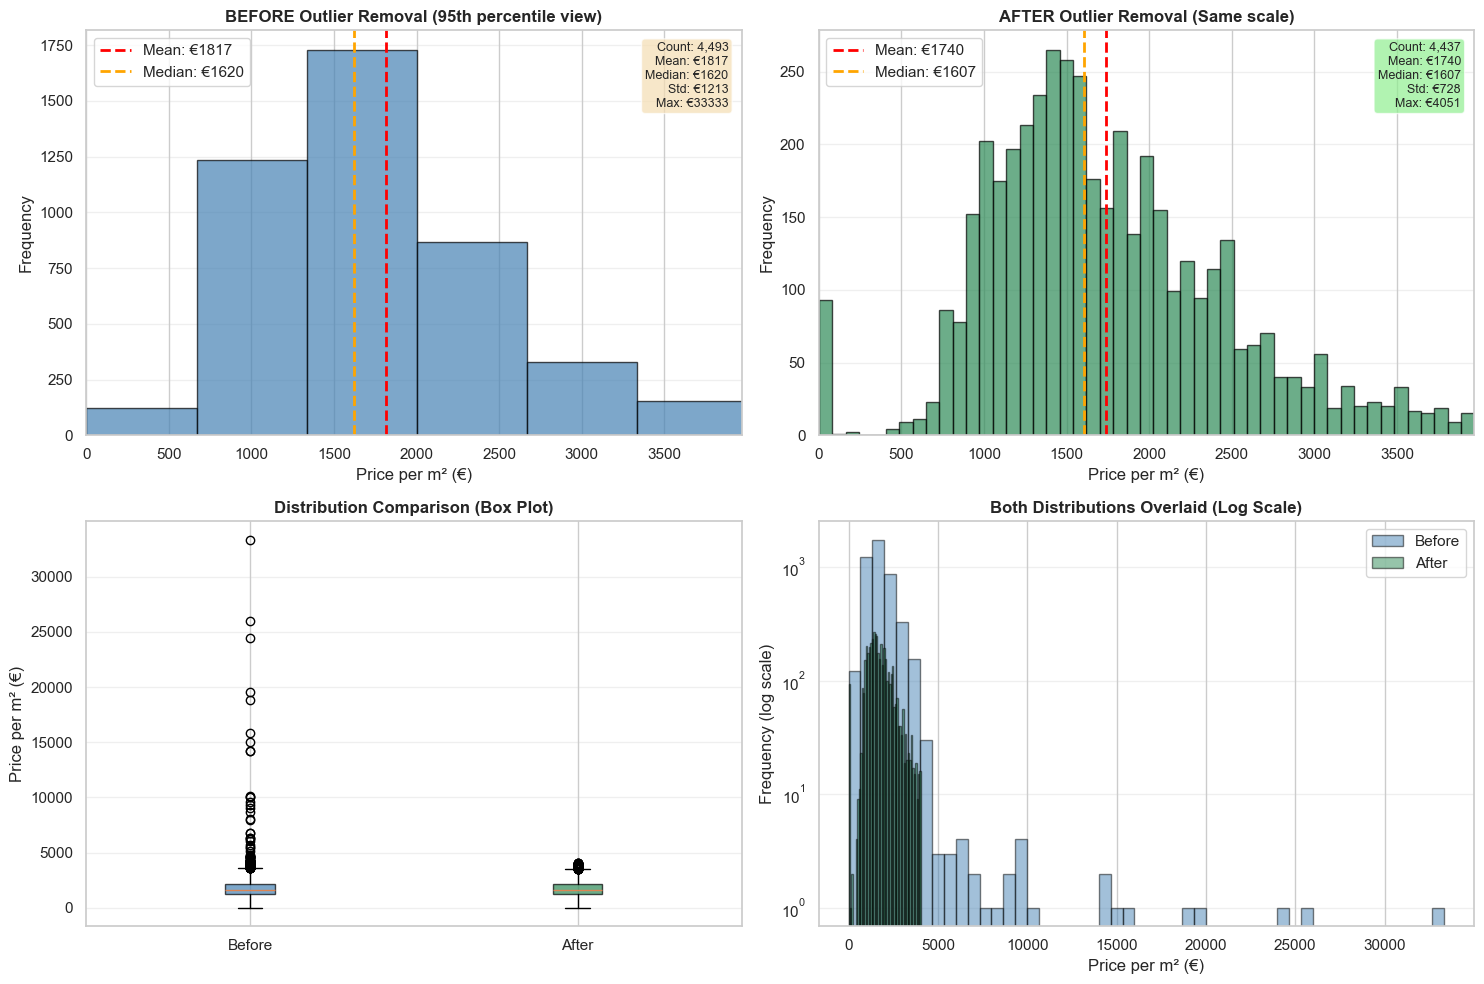


OUTLIER REMOVAL IMPACT ANALYSIS

         Metric    Before    After
 Total Listings     4,493    4,437
  Mean Price/m²  €1817.29 €1739.73
Median Price/m²  €1620.18 €1607.06
        Std Dev  €1212.79  €728.38
   Min Price/m²     €1.00    €1.00
   Max Price/m² €33333.33 €4050.55
          Range €33332.33 €4049.55
25th Percentile  €1250.00 €1250.00
75th Percentile  €2187.50 €2155.17
            IQR   €937.50  €905.17

--------------------------------------------------------------------------------
CHANGES:
--------------------------------------------------------------------------------
Listings removed: 56 (1.2%)
Mean price/m² change: -4.27%
Median price/m² change: -0.81%
Std Dev change: -39.94%
Max price/m² reduced by: €29282.78



In [10]:
# Create figure with 3 comparison views
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# ============================================================================
# Row 1: Histograms with same scale (limited x-axis)
# ============================================================================

# BEFORE: Limited to 95th percentile for visibility
p95_before = df_clean['price_per_sqm'].quantile(0.95)

axes[0, 0].hist(df_clean['price_per_sqm'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 0].axvline(df_clean['price_per_sqm'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: €{df_clean["price_per_sqm"].mean():.0f}')
axes[0, 0].axvline(df_clean['price_per_sqm'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: €{df_clean["price_per_sqm"].median():.0f}')
axes[0, 0].set_xlim(0, p95_before * 1.2)
axes[0, 0].set_title("BEFORE Outlier Removal (95th percentile view)", fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel("Price per m² (€)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Add statistics
stats_before = f"Count: {len(df_clean):,}\nMean: €{df_clean['price_per_sqm'].mean():.0f}\nMedian: €{df_clean['price_per_sqm'].median():.0f}\nStd: €{df_clean['price_per_sqm'].std():.0f}\nMax: €{df_clean['price_per_sqm'].max():.0f}"
axes[0, 0].text(0.98, 0.97, stats_before, transform=axes[0, 0].transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# AFTER: Same scale for comparison
axes[0, 1].hist(df_analysis['price_per_sqm'], bins=50, alpha=0.7, color='seagreen', edgecolor='black')
axes[0, 1].axvline(df_analysis['price_per_sqm'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: €{df_analysis["price_per_sqm"].mean():.0f}')
axes[0, 1].axvline(df_analysis['price_per_sqm'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: €{df_analysis["price_per_sqm"].median():.0f}')
axes[0, 1].set_xlim(0, p95_before * 1.2)
axes[0, 1].set_title("AFTER Outlier Removal (Same scale)", fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel("Price per m² (€)")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Add statistics
stats_after = f"Count: {len(df_analysis):,}\nMean: €{df_analysis['price_per_sqm'].mean():.0f}\nMedian: €{df_analysis['price_per_sqm'].median():.0f}\nStd: €{df_analysis['price_per_sqm'].std():.0f}\nMax: €{df_analysis['price_per_sqm'].max():.0f}"
axes[0, 1].text(0.98, 0.97, stats_after, transform=axes[0, 1].transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# ============================================================================
# Row 2: Box plots for distribution comparison
# ============================================================================

# Prepare data for box plot
box_data = [df_clean['price_per_sqm'], df_analysis['price_per_sqm']]
bp = axes[1, 0].boxplot(box_data, labels=['Before', 'After'], patch_artist=True)

# Color the boxes
colors = ['steelblue', 'seagreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 0].set_ylabel("Price per m² (€)")
axes[1, 0].set_title("Distribution Comparison (Box Plot)", fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# ============================================================================
# Row 2 Right: Log scale histogram (shows full range)
# ============================================================================

axes[1, 1].hist(df_clean['price_per_sqm'], bins=50, alpha=0.5, color='steelblue', label='Before', edgecolor='black')
axes[1, 1].hist(df_analysis['price_per_sqm'], bins=50, alpha=0.5, color='seagreen', label='After', edgecolor='black')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title("Both Distributions Overlaid (Log Scale)", fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel("Price per m² (€)")
axes[1, 1].set_ylabel("Frequency (log scale)")
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# DETAILED COMPARISON TABLE
# ============================================================================
print("\n" + "="*80)
print("OUTLIER REMOVAL IMPACT ANALYSIS")
print("="*80 + "\n")

comparison = {
    'Metric': [
        'Total Listings',
        'Mean Price/m²',
        'Median Price/m²',
        'Std Dev',
        'Min Price/m²',
        'Max Price/m²',
        'Range',
        '25th Percentile',
        '75th Percentile',
        'IQR'
    ],
    'Before': [
        f"{len(df_clean):,}",
        f"€{df_clean['price_per_sqm'].mean():.2f}",
        f"€{df_clean['price_per_sqm'].median():.2f}",
        f"€{df_clean['price_per_sqm'].std():.2f}",
        f"€{df_clean['price_per_sqm'].min():.2f}",
        f"€{df_clean['price_per_sqm'].max():.2f}",
        f"€{df_clean['price_per_sqm'].max() - df_clean['price_per_sqm'].min():.2f}",
        f"€{df_clean['price_per_sqm'].quantile(0.25):.2f}",
        f"€{df_clean['price_per_sqm'].quantile(0.75):.2f}",
        f"€{df_clean['price_per_sqm'].quantile(0.75) - df_clean['price_per_sqm'].quantile(0.25):.2f}"
    ],
    'After': [
        f"{len(df_analysis):,}",
        f"€{df_analysis['price_per_sqm'].mean():.2f}",
        f"€{df_analysis['price_per_sqm'].median():.2f}",
        f"€{df_analysis['price_per_sqm'].std():.2f}",
        f"€{df_analysis['price_per_sqm'].min():.2f}",
        f"€{df_analysis['price_per_sqm'].max():.2f}",
        f"€{df_analysis['price_per_sqm'].max() - df_analysis['price_per_sqm'].min():.2f}",
        f"€{df_analysis['price_per_sqm'].quantile(0.25):.2f}",
        f"€{df_analysis['price_per_sqm'].quantile(0.75):.2f}",
        f"€{df_analysis['price_per_sqm'].quantile(0.75) - df_analysis['price_per_sqm'].quantile(0.25):.2f}"
    ]
}

comparison_df = pd.DataFrame(comparison)
print(comparison_df.to_string(index=False))

# Calculate percent changes
print("\n" + "-"*80)
print("CHANGES:")
print("-"*80)
pct_removed = ((len(df_clean) - len(df_analysis)) / len(df_clean)) * 100
mean_change = ((df_analysis['price_per_sqm'].mean() - df_clean['price_per_sqm'].mean()) /
               df_clean['price_per_sqm'].mean()) * 100
std_change = ((df_analysis['price_per_sqm'].std() - df_clean['price_per_sqm'].std()) /
              df_clean['price_per_sqm'].std()) * 100
median_change = ((df_analysis['price_per_sqm'].median() - df_clean['price_per_sqm'].median()) /
                 df_clean['price_per_sqm'].median()) * 100

print(f"Listings removed: {len(df_clean) - len(df_analysis):,} ({pct_removed:.1f}%)")
print(f"Mean price/m² change: {mean_change:+.2f}%")
print(f"Median price/m² change: {median_change:+.2f}%")
print(f"Std Dev change: {std_change:+.2f}%")
print(f"Max price/m² reduced by: €{df_clean['price_per_sqm'].max() - df_analysis['price_per_sqm'].max():.2f}")

print("\n" + "="*80)

<hr style="border:1px solid #ddd;">



<p style="font-size:15px; line-height:1.6;">
In this phase, we perform <b>feature engineering</b> to enhance the dataset and
prepare it for analysis or modeling.
</p>

<p style="font-size:15px; line-height:1.6;">
We start by computing a <b>statistical summary</b> of all numeric columns,
including count, mean, standard deviation, min, quartiles, and max, to quickly
understand <b>price ranges</b> and <b>apartment sizes</b>.
</p>

<ul style="font-size:15px;">
  <li>📊 Generate statistical summaries for numeric features</li>
  <li>💡 Identify trends and variability in prices and areas</li>
  <li>🔍 Highlight potential insights for further analysis</li>
</ul>


In [11]:
numeric_cols = df_analysis.select_dtypes(include=[np.number]).columns
print("NUMERIC COLUMNS:")
print(list(numeric_cols))

print("\nSTATISTICAL SUMMARY (numeric features):")
df_analysis[numeric_cols].describe().T

NUMERIC COLUMNS:
['price_eur', 'area_sqm', 'floor', 'bedrooms', 'bathrooms', 'balconies', 'living_rooms', 'has_elevator', 'has_parking_space', 'has_garage', 'has_terrace', 'has_garden', 'lat', 'lng', 'price_per_sqm', 'is_price_outlier']

STATISTICAL SUMMARY (numeric features):


,count,mean,std,min,25%,50%,75%,max
price_eur,4437.0,177750.233491,120627.726094,67.0,105000.000000,145000.000000,215000.000000,2.000000e+06
area_sqm,4437.0,136.717872,1087.224250,25.0,73.000000,95.000000,117.500000,5.000000e+04
floor,4197.0,4.359066,2.982627,-1.0,2.000000,4.000000,6.000000,3.300000e+01
bedrooms,4401.0,1.843445,0.806667,-1.0,1.000000,2.000000,2.000000,8.000000e+00
bathrooms,4401.0,1.249943,0.859844,-1.0,1.000000,1.000000,2.000000,5.000000e+00
balconies,4401.0,-0.040218,1.178007,-1.0,-1.000000,-1.000000,1.000000,4.000000e+00
living_rooms,4401.0,0.177914,0.991062,-1.0,-1.000000,1.000000,1.000000,3.000000e+00
has_elevator,2720.0,0.927574,0.259240,0.0,1.000000,1.000000,1.000000,1.000000e+00
has_parking_space,275.0,0.738182,0.440426,0.0,0.000000,1.000000,1.000000,1.000000e+00
has_garage,341.0,0.689150,0.463522,0.0,0.000000,1.000000,1.000000,1.000000e+00


<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">🧹 3.2 Cleaning and Feature Engineering</h3>

<p style="font-size:15px; line-height:1.6;">
For accurate price analysis, we ensure <b>valid price and size information</b> in the dataset.
</p>

<ul style="font-size:15px;">
  <li>🗑️ Drop rows with missing <code>price_in_euro</code> or <code>main_property_property_square</code></li>
  <li>❌ Remove rows where apartment size is zero or negative</li>
  <li>➕ Add new features: <code>distance_from_center</code> and <code>total_rooms</code></li>
</ul>

<p style="font-size:15px; line-height:1.6;">
These steps ensure the dataset is clean and enriched for further analysis.
</p>


In [12]:
print("\nShape of cleaned DataFrame:", df_analysis.shape)

# ======================================================================
# FIX NEGATIVE / NON-SENSICAL NUMERIC VALUES
# ======================================================================
# Columns that should NOT be negative (counts, floors, area, price)
non_negative_cols = [
    "price_eur",
    "area_sqm",
    "floor",
    "bedrooms",
    "bathrooms",
    "balconies",
    "living_rooms"
]

for col in non_negative_cols:
    if col in df_analysis.columns:
        # Turn negative values (< 0) into NaN so they are treated as missing
        df_analysis.loc[df_analysis[col] < 0, col] = np.nan


print("\nAFTER basic filters (apartment / for_sale):", df_analysis.shape)


# ============================================================================
# ADD DISTANCE FROM CITY CENTER FEATURE
# ============================================================================
# Tirana city center coordinates
TIRANA_CENTER_LAT = 41.3275
TIRANA_CENTER_LNG = 19.8187

print(f"Tirana center coordinates: ({TIRANA_CENTER_LAT}, {TIRANA_CENTER_LNG})\n")

# Function to calculate distance between two coordinates (Haversine formula)
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    Returns distance in kilometers
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))

    # Radius of earth in kilometers
    R = 6371
    distance = R * c

    return distance

# Calculate distance from center for all listings
df_analysis['distance_from_center'] = df_analysis.apply(
    lambda row: haversine_distance(
        TIRANA_CENTER_LAT,
        TIRANA_CENTER_LNG,
        row['lat'],
        row['lng']
    ) if pd.notna(row['lat']) and pd.notna(row['lng']) else None,
    axis=1
)

print(f"\n{'='*80}")
print(f"DISTANCE_FROM_CENTER STATISTICS")
print(f"{'='*80}\n")

print(df_analysis['distance_from_center'].describe())

print(f"\nDistance range: {df_analysis['distance_from_center'].min():.2f} km to {df_analysis['distance_from_center'].max():.2f} km")


# ======================================================================
# IMPUTE MISSING VALUES FOR ALL REMAINING COLUMNS → df_model
# ======================================================================
df_model = df_analysis.copy()

# Numeric columns → fill NaN with median
num_cols = df_model.select_dtypes(include=["number"]).columns.tolist()
for col in num_cols:
    median_val = df_model[col].median()
    df_model[col] = df_model[col].fillna(median_val)

# Categorical / object columns → fill NaN with most frequent value (mode)
cat_cols = df_model.select_dtypes(include=["object", "category"]).columns.tolist()
for col in cat_cols:
    mode_val = df_model[col].mode(dropna=True)
    if len(mode_val) > 0:
        df_model[col] = df_model[col].fillna(mode_val[0])

print("\nAFTER IMPUTATION (df_model ready for EDA / modeling)")
print("Shape:", df_model.shape)


Shape of cleaned DataFrame: (4437, 22)

AFTER basic filters (apartment / for_sale): (4437, 22)
Tirana center coordinates: (41.3275, 19.8187)


DISTANCE_FROM_CENTER STATISTICS

count    4437.000000
mean        9.216588
std       170.287639
min         0.059643
25%         1.329846
50%         2.108441
75%         3.009725
max      5009.517431
Name: distance_from_center, dtype: float64

Distance range: 0.06 km to 5009.52 km

AFTER IMPUTATION (df_model ready for EDA / modeling)
Shape: (4437, 23)


<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">📊 Apartment Market Feature Distributions</h3>

<p style="font-size:15px; line-height:1.6;">
This section visualizes the distributions of key numerical features in the apartment dataset. 
Extreme outliers are capped at the 99th percentile to improve clarity.
</p>

<ul style="font-size:15px;">
  <li>🔹 <b>Total Price (EUR)</b> – Shows the distribution of apartment prices with a 99th percentile cap to reduce the influence of extreme values.</li>
  <li>🔹 <b>Area (sqm)</b> – Visualizes the distribution of apartment sizes, capped at the 99th percentile.</li>
  <li>🔹 <b>Price per sqm (EUR/sqm)</b> – Highlights the variation in price per square meter across listings.</li>
  <li>🔹 <b>Distance from Center (Km)</b> – Displays the density of apartments’ distance from the city center, limited to the 99th percentile and 0–20 km range for readability.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
These histograms help identify typical ranges, central tendencies, and potential anomalies in the dataset, providing a foundation for further exploratory data analysis (EDA) and feature engineering.
</p>


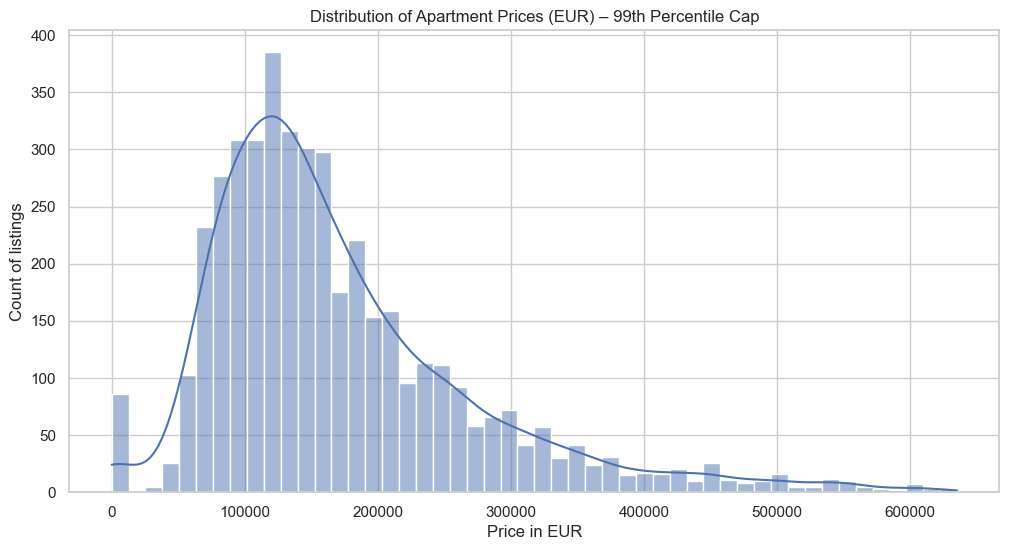

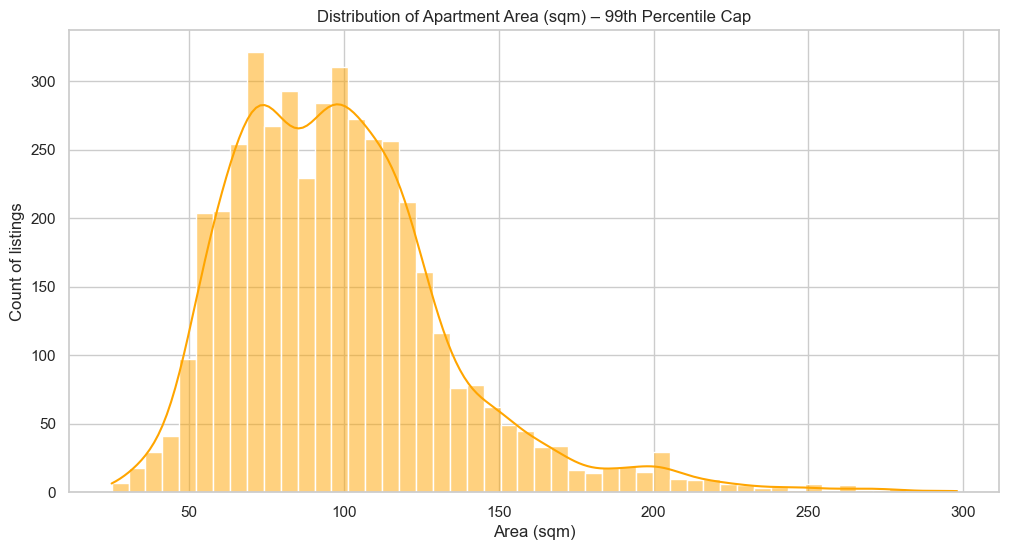

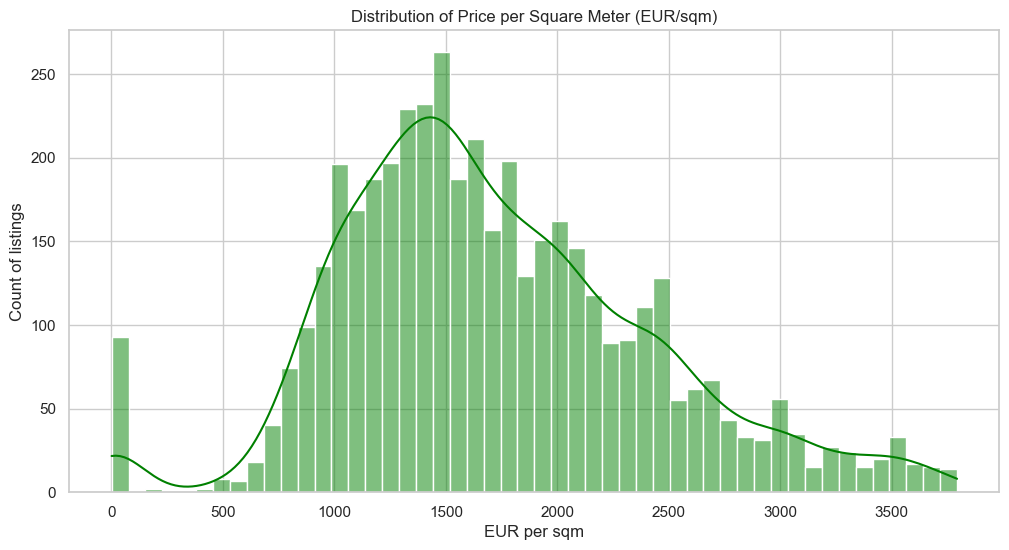

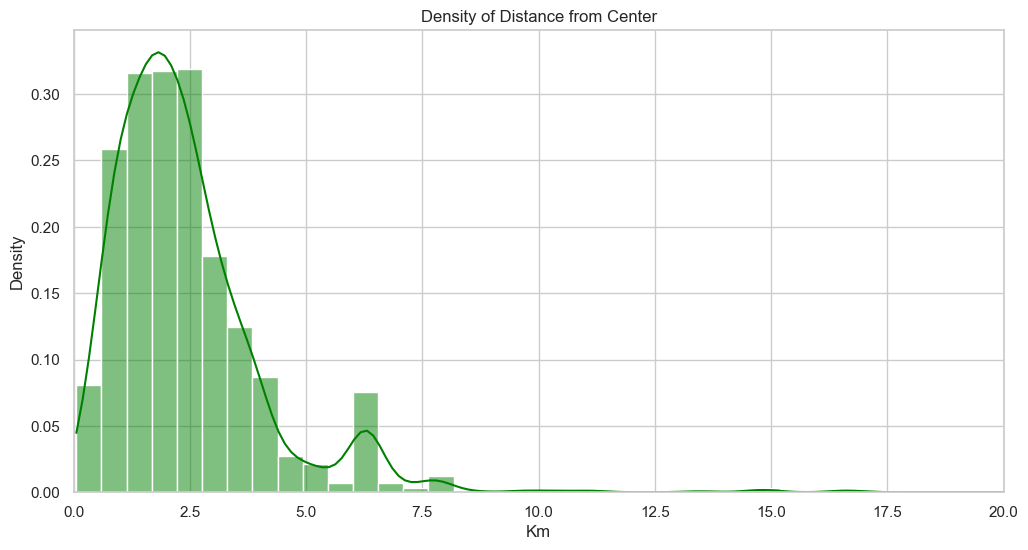

In [13]:
# Histogram of total price in EUR (with upper cap to reduce influence of extreme outliers)
plt.figure()
sns.histplot(data=df_model[df_model["price_eur"] < df_model["price_eur"].quantile(0.99)],
             x="price_eur", bins=50, kde=True)
plt.title("Distribution of Apartment Prices (EUR) – 99th Percentile Cap")
plt.xlabel("Price in EUR")
plt.ylabel("Count of listings")
plt.show()

# Histogram of area in square meters
plt.figure()
sns.histplot(data=df_model[df_model["area_sqm"] < df_model["area_sqm"].quantile(0.99)],
             x="area_sqm", bins=50, kde=True, color="orange")
plt.title("Distribution of Apartment Area (sqm) – 99th Percentile Cap")
plt.xlabel("Area (sqm)")
plt.ylabel("Count of listings")
plt.show()

# Histogram of price per square meter
plt.figure()
sns.histplot(data=df_model[df_model["price_per_sqm"] < df_model["price_per_sqm"].quantile(0.99)],
             x="price_per_sqm", bins=50, kde=True, color="green")
plt.title("Distribution of Price per Square Meter (EUR/sqm)")
plt.xlabel("EUR per sqm")
plt.ylabel("Count of listings")
plt.show()

# Histogram of distance from the center
plt.figure()
sns.histplot(
    data=df_model[df_model["distance_from_center"] < df_model["distance_from_center"].quantile(0.99)],
    x="distance_from_center",
    bins=50,
    kde=True,
    stat="density",
    color="green"
)

plt.title("Density of Distance from Center")
plt.xlabel("Km")
plt.ylabel("Density")
plt.xlim(0, 20)
plt.show()



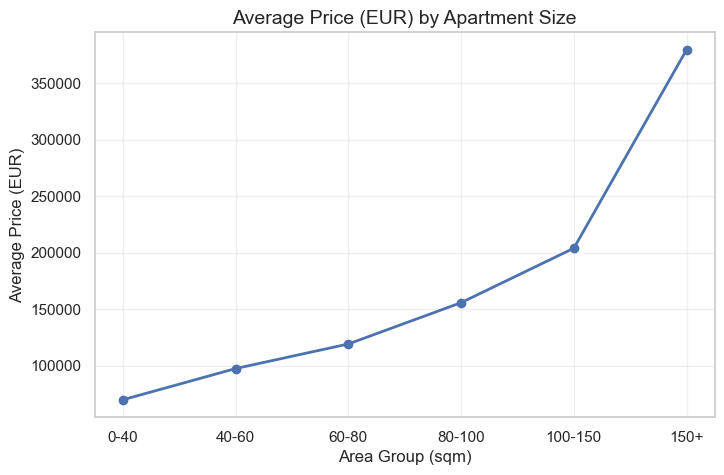

In [14]:
# Create area groups for simpler visualization
df_model["area_group"] = pd.cut(
    df_model["area_sqm"],
    bins=[0, 40, 60, 80, 100, 150, 300],
    labels=["0-40", "40-60", "60-80", "80-100", "100-150", "150+"]
)

# Calculate mean price for each group
area_mean = df_model.groupby("area_group")["price_eur"].mean().reset_index()

# Line chart
plt.figure(figsize=(8,5))
plt.plot(area_mean["area_group"], area_mean["price_eur"], marker="o", linewidth=2)
plt.title("Average Price (EUR) by Apartment Size", fontsize=14)
plt.xlabel("Area Group (sqm)", fontsize=12)
plt.ylabel("Average Price (EUR)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


<hr style="border:1px solid #ddd;">

<p style="font-size:15px; line-height:1.6;">
This chart shows how the <b>average apartment price</b> changes with <b>size</b>, highlighting the trend of increasing price as area grows.
</p>


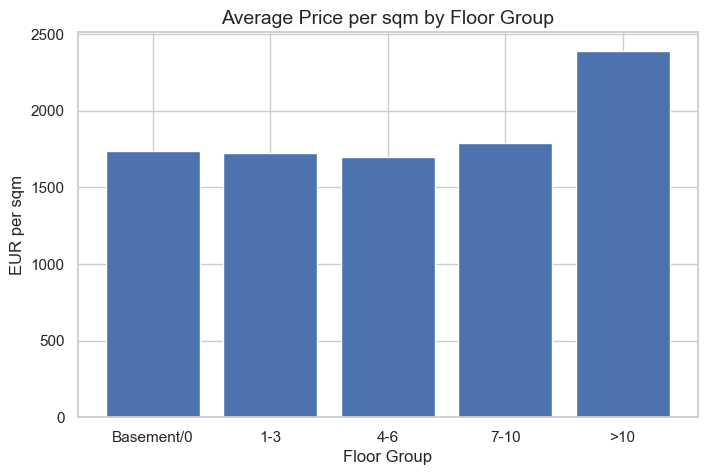

In [15]:
# If floor_group is not created yet:
df_model["floor_group"] = pd.cut(
    df_model["floor"],
    bins=[-2, 0, 3, 6, 10, 40],
    labels=["Basement/0", "1-3", "4-6", "7-10", ">10"]
)

# Calculate mean €/m² per floor group
floor_mean = df_model.groupby("floor_group")["price_per_sqm"].mean().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(floor_mean["floor_group"], floor_mean["price_per_sqm"])
plt.title("Average Price per sqm by Floor Group", fontsize=14)
plt.xlabel("Floor Group", fontsize=12)
plt.ylabel("EUR per sqm", fontsize=12)
plt.show()


<hr style="border:1px solid #ddd;">

<p style="font-size:15px; line-height:1.6;">
This chart shows the <b>average price per square meter</b> for each <b>floor group</b>, illustrating how price per sqm varies depending on the apartment’s floor level.
</p>


In [18]:
# -------------------------------
# 2. Price vs Area (cleaned data)
# -------------------------------
























<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">📊 Correlation Matrix for Numeric Features</h3>

<p style="font-size:15px; line-height:1.6;">
We examine the <b>linear correlations</b> between the main numeric variables, including <code>price_per_sqm</code>. 
This helps identify which features are most strongly associated with overall price and price per square meter, providing insights for further analysis and modeling.
</p>


In [ ]:
df

<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">🏠 Total Rooms & Correlation Matrix</h3>

<p style="font-size:15px; line-height:1.6;">
We create a new feature <b>total_rooms</b> by summing all room types (bedrooms, bathrooms, living rooms, kitchens, balconies). 
The updated correlation matrix shows how <b>total_rooms</b> and other numeric features relate to apartment price and price per square meter.
</p>


In [ ]:
# ============================================================================
# ADD TOTAL ROOMS FEATURE
# ============================================================================

print("="*80)
print("ADDING TOTAL_ROOMS FEATURE")
print("="*80 + "\n")

# Check which room columns exist
room_columns = ['bedrooms', 'bathrooms', 'living_rooms', 'kitchens', 'balconies']
available_cols = [col for col in room_columns if col in df_model.columns]

print(f"Available room columns: {available_cols}\n")

# Create total_rooms by summing all room types
df_model['total_rooms'] = df_model[available_cols].sum(axis=1)

# ============================================================================
# RE-RUN CORRELATION ANALYSIS WITH NEW FEATURE
# ============================================================================

# Select numeric columns for correlation (excluding flags and derived columns)
numeric_cols = ['price_eur', 'area_sqm', 'floor', 'total_rooms', 'distance_from_center']
numeric_cols = [col for col in numeric_cols if col in df_model.columns]

# Create correlation matrix
correlation_matrix = df_model[numeric_cols].corr()

print(f"\n{'='*80}")
print(f"UPDATED CORRELATION MATRIX")
print(f"{'='*80}\n")
print(correlation_matrix.round(3))

# ============================================================================
# VISUALIZE UPDATED CORRELATION MATRIX
# ============================================================================

fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.4f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'},
            ax=ax,
            vmin=-1, vmax=1)

plt.title('Correlation Matrix - Including Total Rooms', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
df_model.head()

<hr style="border:1px solid #ddd;">
<h2 style="color:#2c3e50;">🛠️ Phase 4: Data Preprocessing</h2>
<h3 style="color:#2c3e50;">One-Hot Encoding & Feature Preprocessing</h3>

<p style="font-size:15px; line-height:1.6;">
We preprocess the dataset by keeping numeric features as is and applying <b>one-hot encoding</b> to categorical columns like <code>furnishing_status</code>. 
Text columns such as <code>description</code> are dropped. This creates a clean, machine-learning-ready dataset with all categorical variables converted into numeric format.
</p>

<ul style="font-size:15px;">
  <li>🔹 Numeric features: price, area, floor, rooms, elevators, parking, location, etc.</li>
  <li>🔹 Categorical features: converted to binary columns using <code>OneHotEncoder</code> with <code>drop='first'</code> to avoid multicollinearity.</li>
  <li>🔹 Result: a fully numeric DataFrame <code>df_encoded</code> suitable for ML pipelines.</li>
</ul>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns to encode
categorical_features = [
    'furnishing_status'
]

# Identify numerical features (keep as is)
numerical_features = [
    'price_eur',
    'area_sqm',
    'floor',
    'bedrooms',
    'bathrooms',
    'balconies',
    'living_rooms',
    'has_elevator',
    'has_parking_space',
    'lat',
    'lng',
    'price_per_sqm',
    'is_price_outlier',
    'distance_from_center',
    'total_rooms'
]

# Features to drop (text descriptions, coordinates already captured, etc.)
features_to_drop = ['description']  # Drop long text columns

# Method 1: Using sklearn ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
            drop='first'  # Avoid multicollinearity
        ), categorical_features)
    ],
    remainder='drop'
)

# Fit and transform the data
X_transformed = preprocessor.fit_transform(df_model)

# Get feature names
feature_names = (
    numerical_features +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

# Create new DataFrame with encoded features
df_encoded = pd.DataFrame(X_transformed, columns=feature_names)

print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)
print("\nFirst few rows:")
print(df_encoded.head())

<hr style="border:1px solid #ddd;">

<h2 style="color:#2c3e50;">⚡ Phase 5: Train/Test Split & Standard Scaling</h2>

<p style="font-size:15px; line-height:1.6;">
We prepare the dataset for machine learning by splitting it into <b>training</b> and <b>testing</b> sets and standardizing numeric features. 
Standard scaling ensures all numeric variables have a mean of 0 and a standard deviation of 1, improving model performance and convergence.
</p>

<ul style="font-size:15px;">
  <li>🔹 <b>Features & Target:</b> <code>X</code> contains all predictors, <code>y</code> is <code>price_eur</code>.</li>
  <li>🔹 <b>Numeric columns scaled:</b> area, floor, rooms, location, price_per_sqm, distance_from_center, total_rooms.</li>
  <li>🔹 <b>Train/Test Split:</b> 80% train, 20% test (<code>random_state=42</code> for reproducibility).</li>
  <li>🔹 <b>Scaling:</b> StandardScaler applied to numeric columns, with rounded output for clean inspection.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
After scaling, the training set numeric features have mean ~0 and std ~1, ensuring consistency across features for machine learning models.
</p>


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# -------------------------------
# 1. Features & Target
# -------------------------------
X = df_encoded.drop(columns=['price_eur'])
y = df_encoded['price_eur']

# -------------------------------
# 2. Numerical columns
# -------------------------------
num_cols = [
    'area_sqm', 'floor', 'bedrooms', 'bathrooms',
    'balconies', 'living_rooms', 'lat', 'lng',
    'price_per_sqm', 'distance_from_center', 'total_rooms'
]

# -------------------------------
# 3. Train / Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 4. Standard Scaling
# -------------------------------
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# -------------------------------
# 5. Round values (for clean output)
# -------------------------------
X_train[num_cols] = X_train[num_cols].round(3)

# -------------------------------
# 6. AFTER SCALING summary
# -------------------------------
print("\nAFTER SCALING (TRAIN SET)")
print(X_train[num_cols].describe().round(3).loc[['mean', 'std', 'min', 'max']])


<h2 style="color:#2c3e50;">🚀 Phase 6: Baseline Model</h2> <p style="font-size:14px; line-height:1.5;"> We start with a <b>baseline model</b>—a simple, minimally tuned version to establish a reference point. This helps us quickly understand the problem and evaluate initial performance.</p> <ul style="font-size:14px;"> <li>🔹 Provides a <b>performance benchmark</b> to beat</li> <li>🔹 Acts as a <b>reality check</b> on learnability</li> <li>🔹 Offers a <b>quick diagnostic</b> of obvious issues</li> </ul>

<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">📊 Tirana House Prices Final Dashboard</h3>

<p style="font-size:15px; line-height:1.6;">
This dashboard provides a comprehensive visual analysis of apartment listings in Tirana, using a <b>cohesive color palette</b> to highlight key patterns and distributions.
</p>

<ul style="font-size:15px;">
  <li>🔹 <b>Box Plot Comparison:</b> Shows the <b>price per m² distribution</b> before and after outlier removal.</li>
  <li>🔹 <b>Price Distribution:</b> Histogram of apartment prices capped at the 99th percentile for clarity.</li>
  <li>🔹 <b>Area Distribution:</b> Histogram of apartment sizes (sqm) with 99th percentile cap.</li>
  <li>🔹 <b>Distance from Center:</b> Density plot highlighting how far apartments are from the city center.</li>
  <li>🔹 <b>Average Price by Size:</b> Line chart showing the trend of average price as <b>apartment area increases</b>.</li>
  <li>🔹 <b>Correlation Matrix:</b> Heatmap of key numeric features including <b>total_rooms</b> and <b>price_per_sqm</b>.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
The dashboard uses <b>professional color coding</b> for clear distinction between metrics, facilitating rapid insight into pricing patterns, room characteristics, and spatial distribution for real estate analysis in Tirana.
</p>


In [ ]:
# Set a cohesive color palette
# Using a professional palette with blues, teals, and complementary warm colors
COLOR_PALETTE = {
    'primary': '#A8DADC',      # Soft cyan
    'secondary': '#E5C3D1',    # Pastel pink
    'accent1': '#F4C2A0',      # Peachy pastel
    'accent2': '#D4A5A5',      # Dusty rose
    'neutral': '#C9C9C9',      # Soft gray
    'teal': '#9EC5C8',         # Pastel teal
    'light_blue': '#B4D4E1',   # Powder blue
    'warm': '#E8D5B7'          # Warm cream
}

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette([COLOR_PALETTE['primary'], COLOR_PALETTE['secondary'],
                 COLOR_PALETTE['accent1'], COLOR_PALETTE['teal']])

# Create the main dashboard figure
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3,
                      left=0.05, right=0.98, top=0.95, bottom=0.05)

# Add main title
fig.suptitle('Tirana House Prices EDA Dashboard',
             fontsize=20, fontweight='bold', y=1)

# 1. Box Plot Comparison
ax1 = fig.add_subplot(gs[0, 0])
box_data = [df_clean['price_per_sqm'], df_analysis['price_per_sqm']]
bp = ax1.boxplot(box_data, labels=['Before', 'After'], patch_artist=True,
                 widths=0.6)
bp['boxes'][0].set_facecolor(COLOR_PALETTE['light_blue'])
bp['boxes'][1].set_facecolor(COLOR_PALETTE['teal'])
for box in bp['boxes']:
    box.set_alpha(0.7)
    box.set_linewidth(1.5)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], linewidth=1.5)
ax1.set_ylabel("Price per m² (€)", fontsize=10)
ax1.set_title("Distribution Comparison", fontsize=12, fontweight='bold', pad=10)
ax1.grid(axis='y', alpha=0.3)

# 2. Price Distribution
ax2 = fig.add_subplot(gs[0, 1])
df_plot = df_model[df_model["price_eur"] < df_model["price_eur"].quantile(0.99)]
sns.histplot(data=df_plot, x="price_eur", bins=50, kde=True,
             color=COLOR_PALETTE['primary'], alpha=0.7, ax=ax2)
ax2.set_title("Price Distribution (EUR)", fontsize=12, fontweight='bold', pad=10)
ax2.set_xlabel("Price (EUR)", fontsize=10)
ax2.set_ylabel("Count", fontsize=10)
ax2.grid(alpha=0.3)

# 3. Area Distribution
ax3 = fig.add_subplot(gs[0, 2])
df_plot = df_model[df_model["area_sqm"] < df_model["area_sqm"].quantile(0.99)]
sns.histplot(data=df_plot, x="area_sqm", bins=50, kde=True,
             color=COLOR_PALETTE['accent1'], alpha=0.7, ax=ax3)
ax3.set_title("Area Distribution (sqm)", fontsize=12, fontweight='bold', pad=10)
ax3.set_xlabel("Area (sqm)", fontsize=10)
ax3.set_ylabel("Count", fontsize=10)
ax3.grid(alpha=0.3)

# 4. Distance from Center
ax4 = fig.add_subplot(gs[1, 0])
df_plot = df_model[df_model["distance_from_center"] < df_model["distance_from_center"].quantile(0.99)]
sns.histplot(data=df_plot, x="distance_from_center", bins=50, kde=True,
             stat="density", color=COLOR_PALETTE['secondary'], alpha=0.7, ax=ax4)
ax4.set_title("Distance from Center Density", fontsize=12, fontweight='bold', pad=10)
ax4.set_xlabel("Distance (km)", fontsize=10)
ax4.set_ylabel("Density", fontsize=10)
ax4.set_xlim(0, 20)
ax4.grid(alpha=0.3)

# 5. Average Price by Area Group
ax5 = fig.add_subplot(gs[2, 0])
df_model["area_group"] = pd.cut(
    df_model["area_sqm"],
    bins=[0, 40, 60, 80, 100, 150, 300],
    labels=["0-40", "40-60", "60-80", "80-100", "100-150", "150+"]
)
area_mean = df_model.groupby("area_group")["price_eur"].mean().reset_index()
ax5.plot(area_mean["area_group"], area_mean["price_eur"],
         marker="o", linewidth=3, markersize=10,
         color=COLOR_PALETTE['primary'], markerfacecolor=COLOR_PALETTE['accent1'],
         markeredgewidth=2, markeredgecolor=COLOR_PALETTE['primary'])
ax5.set_title("Average Price by Apartment Size", fontsize=12, fontweight='bold', pad=10)
ax5.set_xlabel("Area Group (sqm)", fontsize=10)
ax5.set_ylabel("Average Price (EUR)", fontsize=10)
ax5.grid(True, alpha=0.3)
ax5.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}K'))


# 10. Correlation Matrix
ax10 = fig.add_subplot(gs[1:, 1:])

sns.heatmap(correlation_matrix, annot=True, fmt='.3f',
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={'label': 'Correlation', 'shrink': 0.8},
            ax=ax10, vmin=-1, vmax=1, annot_kws={'size': 10})
ax10.set_title('Correlation Matrix - Key Features', fontsize=12, fontweight='bold', pad=10)
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=45, ha='right', fontsize=9)
ax10.set_yticklabels(ax10.get_yticklabels(), rotation=0, fontsize=9)

plt.savefig('Tirana_House_Prices_EDA_Dashboard.png')
plt.show()

<hr style="border:1px solid #ddd;">

<h3 style="color:#2c3e50;">🗺️ Tirana Apartment Prices Interactive Map</h3>

<p style="font-size:15px; line-height:1.6;">
This interactive map visualizes apartment listings in Tirana using <b>latitude and longitude coordinates</b>. The map includes two layers:
</p>

<ul style="font-size:15px;">
  <li>🔹 <b>Clustered Markers:</b> Groups nearby listings for a cleaner overview. Click a cluster to zoom in and explore individual apartments.</li>
  <li>🔹 <b>Individual Markers:</b> Each apartment is displayed separately. The <b>size</b> of the marker is proportional to <b>price per m²</b>.</li>
  <li>🔹 <b>Color:</b> Represents the price per m²:
    <ul>
      <li>🟢 Green: Affordable (&lt; €1,200)</li>
      <li>🟠 Orange: Mid-range (€1,200–€2,300)</li>
      <li>🔴 Red: Expensive (&gt; €2,300)</li>
    </ul>
  </li>
  <li>🔹 <b>Popup:</b> Shows <b>total price</b>, <b>area</b>, <b>price per m²</b>, and optionally <b>bedrooms</b>.</li>
</ul>

<p style="font-size:15px; line-height:1.6;">
Use the layer control (top-right) to toggle between <b>Clustered</b> and <b>Individual</b> markers. The map is centered on <b>Tirana</b> and allows for intuitive exploration of <b>spatial price trends</b> across the city. It is saved as an HTML file for easy sharing and interactive use.
</p>


In [ ]:
#!pip install folium

In [ ]:
from folium import Map, FeatureGroup, CircleMarker, LayerControl
from folium.plugins import MarkerCluster
from IPython.display import display, IFrame

# --- Base map ---
tirana_center = [41.3275, 19.8189]
m = Map(location=tirana_center, zoom_start=12, tiles="cartodb positron")

# --- Layers ---
cluster_layer = FeatureGroup(name="🟢 Clustered Markers", show=True)
individual_layer = FeatureGroup(name="🔵 Individual Markers", show=False)

# --- Example adding markers to layers ---
marker_cluster = MarkerCluster().add_to(cluster_layer)
for _, row in df_map.iterrows():
    CircleMarker(
        location=[row['lat'], row['lng']],
        radius=5,
        color=price_to_color(row['price_per_sqm']),
        fill=True,
        fillColor=price_to_color(row['price_per_sqm']),
        fill_opacity=0.7,
        popup=folium.Popup(styled_popup(row, show_bedrooms=True), max_width=250)
    ).add_to(marker_cluster)

for _, row in df_map.iterrows():
    CircleMarker(
        location=[row['lat'], row['lng']],
        radius=price_to_radius(row['price_per_sqm']),
        color=price_to_color(row['price_per_sqm']),
        fill=True,
        fillColor=price_to_color(row['price_per_sqm']),
        fill_opacity=0.7,
        popup=folium.Popup(styled_popup(row, show_bedrooms=False), max_width=250)
    ).add_to(individual_layer)

cluster_layer.add_to(m)
individual_layer.add_to(m)

# --- Styled LayerControl ---
LayerControl(collapsed=False).add_to(m)

# Inject CSS for LayerControl styling
m.get_root().html.add_child(folium.Element("""
<style>
.leaflet-control-layers {
    font-family: 'Arial', sans-serif;
    font-size: 14px;
    background: #f7f7f7;
    border-radius: 6px;
    padding: 10px;
    box-shadow: 0 2px 6px rgba(0,0,0,0.3);
}
.leaflet-control-layers label {
    font-weight: bold;
    margin-bottom: 4px;
}
.leaflet-control-layers input[type="checkbox"] {
    transform: scale(1.2);
    margin-right: 6px;
}
</style>
"""))

# --- Save & display ---
m.save("cmimet_tirane_styled_layers_toggle.html")
display(IFrame("cmimet_tirane_styled_layers_toggle.html", width=1000, height=1000))


<h2 style="color:#2c3e50;">🔑 Key Insight: Apartment Price Prediction Project</h2>
<p style="font-size:14px; line-height:1.6;">
The project shows that predicting apartment prices in Tirana is <b>feasible but complex</b>. Key takeaways include:
</p>
<ul style="font-size:14px; line-height:1.5;">
    <li>📊 <b>Data Cleaning & Feature Engineering:</b> Extracted numerical features like area, bedrooms, bathrooms, total rooms, and distance from center; encoded categorical variables such as furnishing status to prepare the dataset for ML.</li>
    <li>⚡ <b>Baseline Modeling:</b> Linear Regression establishes a <b>performance benchmark</b> and reveals general relationships between features and price, but struggles with outliers and non-linear patterns.</li>
    <li>🌳 <b>Advanced Models:</b> Ensemble methods like Random Forest or Ridge Regression improve predictions by capturing complex interactions and reducing sensitivity to extreme values.</li>
    <li>🔧 <b>Scaling & Preprocessing:</b> Standard scaling of numerical features ensures stability and comparability across all features.</li>
    <li>📍 <b>EDA & Insights:</b> Analysis of price per m², location, and total rooms provides actionable insights for investors or buyers.</li>
    <li>💡 <b>Takeaway:</b> Combining <b>feature-rich datasets</b> with <b>appropriate models</b> produces reliable predictions, guides investment decisions, and identifies high-value areas in Tirana.</li>
</ul>
<p style="font-size:14px; line-height:1.6; color:#34495e;">
<b>Overall:</b> Thoughtful feature engineering and careful model selection are key to predicting apartment prices accurately.
</p>
